 <center> <h1> <b> Pattern Recognition and Machine Learning (EE2802 - AI2000) </b> </h1> </center>

<b> Programming Assignment - 03 : Classification</b>


This programming assignment offers you an opportunity to implement various linear classification models. You'll begin with straightforward algorithms like Least Squares classification, LDA, and FDA. Subsequently, you'll delve into implementing the perceptron algorithm. Lastly, you'll tackle probabilistic approaches for classification. To deepen your understanding of these methods, you'll compare their performance and application scenarios critically.

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions will be penalized with a scaling factor of 0.5 per day.
3. Please DO NOT use any machine learning libraries unless and otherwise specified.








**Part-1) Least squares approach to classification**

a). Data generation: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 2  \\ 2  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 50 samples per class for training and 200 samples for testing.

b). Find the decision boundary: Assign the target value "0" to all data points in class 1 and the target value "1" to all data points in class 2. Implement the pseudo-inverse solution to determine the weight vector, which represents the decision boundary.


c). Evaluate the quality of decision boundary: A decision boundary is deemed effective if it correctly classifies all data points. Accuracy measures the performance of a classification problem. Calculate the accuracy of the test data using the decision boundary obtained from the pseudo-inverse solution.


d). Visualize the decision boundary: You can either display the decision hyperplane or use different colors to distinguish regions corresponding to the two classes on a 2D plane. Superimpose the test points onto the decision boundary plot.

e). Assign the value "-1" to class1 and the value "+1" to class 2. Repeat the experiments.

f). Experiment with Laplacian distribution and compare the performance of it with the Gaussian distribution experiments

g. Report your observations.




In [1]:
#All imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import random
import math

Accuracy of the decision boundary (Gaussian, 0/1 labels): 91.75


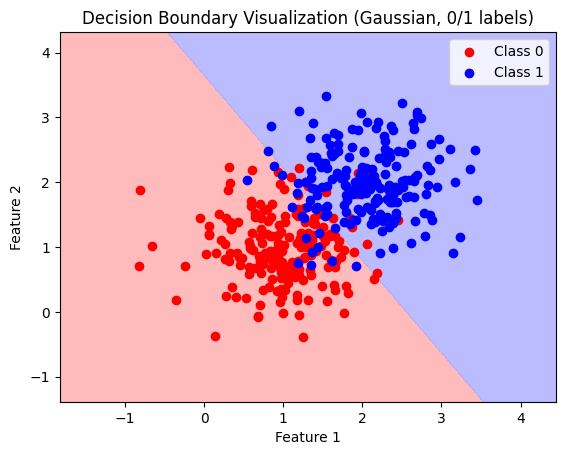

Accuracy of the decision boundary (Gaussian, -1/+1 labels): 90.75


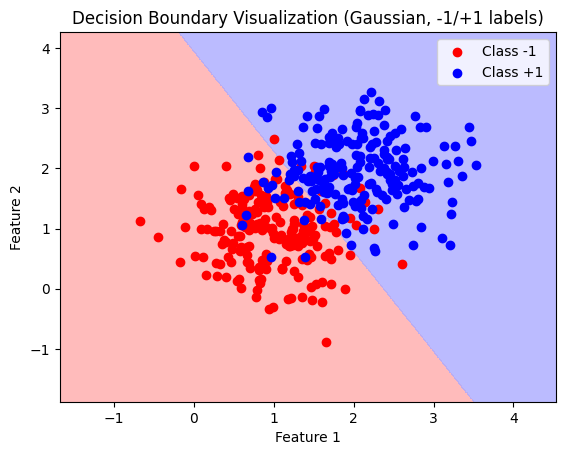

Accuracy of the decision boundary (Laplacian, 0/1 labels): 85.75


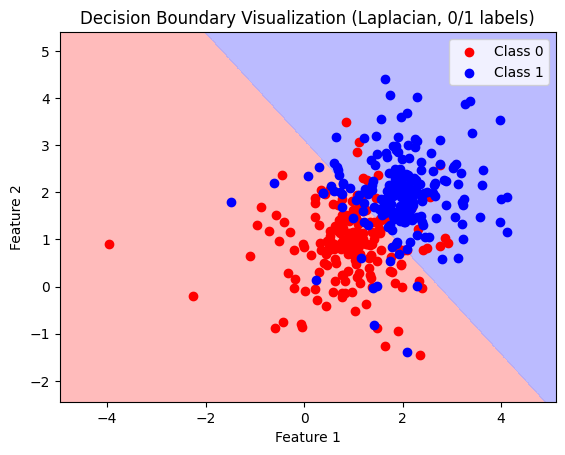

Accuracy of the decision boundary (Laplacian, -1/+1 labels): 83.25


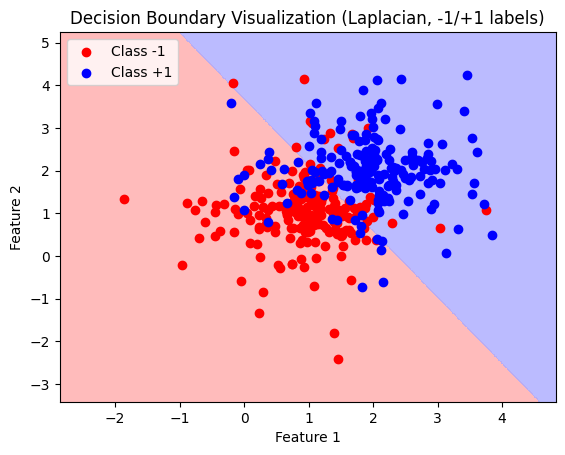

In [45]:
########################################
#Part-1)-a: Data generation
########################################

#Set the parameters of class distribution
mean1 = [1, 1]           # Mean of class1
mean2 = [2, 2]           # Mean of class2
cov = [[0.3, 0], [0, 0.3]] # Covariance matrix. Same covariance for class1 and class2

# Generate training data
class1_tr = np.random.multivariate_normal(mean1, cov, 50)  # Class1 training data
class2_tr = np.random.multivariate_normal(mean2, cov, 50)  # Class2 training data
tr_data = np.vstack((class1_tr, class2_tr))  # Combine class1 and class2 training data
tr_targets = np.hstack((np.zeros(50), np.ones(50)))  # Class labels: 0 for class1, 1 for class2

# Generate testing data
class1_te = np.random.multivariate_normal(mean1, cov, 200)  # Class1 testing data
class2_te = np.random.multivariate_normal(mean2, cov, 200)  # Class2 testing data
te_data = np.vstack((class1_te, class2_te))  # Combine class1 and class2 testing data
te_targets = np.hstack((np.zeros(200), np.ones(200)))  # Class labels: 0 for class1, 1 for class2

########################################
#Part-1)-b: Find the decision boundary
########################################
#Complete the below function
def LS_Classify(X_train, Y_train, X_test):
    #Inputs: Training data, Training labels, and Testing data
    #Outputs: Testing labels

    # Append a column of ones to the training data to account for the bias term
    X_train_aug = np.hstack((X_train, np.ones((X_train.shape[0], 1))))

    # Compute the weight vector using the pseudo-inverse solution
    W = np.linalg.pinv(X_train_aug.T @ X_train_aug) @ X_train_aug.T @ Y_train

    # Append a column of ones to the testing data
    X_test_aug = np.hstack((X_test, np.ones((X_test.shape[0], 1))))

    # Predict the labels of test data using the weight vector
    Y_pred = X_test_aug @ W

    # Return the predicted test labels (apply threshold of 0.5 for binary classification)
    return (Y_pred >= 0.5).astype(int)

# Get the test data predictions
predictions = LS_Classify(tr_data, tr_targets, te_data)


##########################################
#Part-1)-c: Evaluate the quality of decision boundary
##########################################
#Complete the below function
def LS_Classify_Accuracy(Y_test, Y_pred):
    #Inputs: Ground truth test labels and predicted test labels
    #Outputs: Accuracy

    # Compute the accuracy
    accuracy = np.sum(Y_test == Y_pred) / len(Y_test)

    # Return the accuracy
    return accuracy

# Calculate the accuracy of the test data
accuracy = LS_Classify_Accuracy(te_targets, predictions)
print("Accuracy of the decision boundary (Gaussian, 0/1 labels):", accuracy*100)



##########################################
#Part-1)-d: Visualize the decision boundary
##########################################
# Visualize the decision boundary and test points
def visualize_decision_boundary(X_train, Y_train, X_test, Y_test, W):
    #Inputs: Training data, Training labels, Testing data, Testing labels, Weight vector
    #Outputs: Decision boundary plot with test points

    # Create a mesh grid for plotting
    x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
    y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Compute the decision boundary
    Z = np.c_[xx.ravel(), yy.ravel()]
    Z_aug = np.hstack((Z, np.ones((Z.shape[0], 1))))  # Add bias term
    Z = Z_aug @ W
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z >= 0.5, alpha=0.8, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))

    # Plot the training and testing points
    plt.scatter(X_test[Y_test == 0][:, 0], X_test[Y_test == 0][:, 1], color='red', label='Class 0')
    plt.scatter(X_test[Y_test == 1][:, 0], X_test[Y_test == 1][:, 1], color='blue', label='Class 1')
    plt.legend()
    plt.title("Decision Boundary Visualization (Gaussian, 0/1 labels)")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Append a column of ones to the training data to account for the bias term
X_train_aug = np.hstack((tr_data, np.ones((tr_data.shape[0], 1))))
# Compute the weight vector using the pseudo-inverse solution
W = np.linalg.pinv(X_train_aug.T @ X_train_aug) @ X_train_aug.T @ tr_targets

# Visualize the decision boundary
visualize_decision_boundary(tr_data, tr_targets, te_data, te_targets, W)






##########################################
#Part-1)-e: Change the target label notation, and repeat the experiments
# a: Data generation

# Set the parameters of class distribution
mean1 = [1, 1]           # Mean of class1
mean2 = [2, 2]           # Mean of class2
cov = [[0.3, 0], [0, 0.3]] # Covariance matrix. Same covariance for class1 and class2

# Generate training data
class1_tr = np.random.multivariate_normal(mean1, cov, 50)  # Class1 training data
class2_tr = np.random.multivariate_normal(mean2, cov, 50)  # Class2 training data
tr_data = np.vstack((class1_tr, class2_tr))  # Combine class1 and class2 training data
tr_targets = np.hstack((-np.ones(50), np.ones(50)))  # Class labels: -1 for class1, +1 for class2

# Generate testing data
class1_te = np.random.multivariate_normal(mean1, cov, 200)  # Class1 testing data
class2_te = np.random.multivariate_normal(mean2, cov, 200)  # Class2 testing data
te_data = np.vstack((class1_te, class2_te))  # Combine class1 and class2 testing data
te_targets = np.hstack((-np.ones(200), np.ones(200)))  # Class labels: -1 for class1, +1 for class2

########################################
#b: Find the decision boundary
########################################
def LS_Classify(X_train, Y_train, X_test):
    # Inputs: Training data, Training labels, and Testing data
    # Outputs: Testing labels

    # Append a column of ones to the training data to account for the bias term
    X_train_aug = np.hstack((X_train, np.ones((X_train.shape[0], 1))))

    # Compute the weight vector using the pseudo-inverse solution
    W = np.linalg.pinv(X_train_aug.T @ X_train_aug) @ X_train_aug.T @ Y_train

    # Append a column of ones to the testing data
    X_test_aug = np.hstack((X_test, np.ones((X_test.shape[0], 1))))

    # Predict the labels of test data using the weight vector
    Y_pred = X_test_aug @ W

    # Return the predicted test labels (apply threshold of 0 for binary classification)
    return np.sign(Y_pred)

# Get the test data predictions
predictions = LS_Classify(tr_data, tr_targets, te_data)

##########################################
#c: Evaluate the quality of decision boundary
##########################################
def LS_Classify_Accuracy(Y_test, Y_pred):
    # Inputs: Ground truth test labels and predicted test labels
    # Outputs: Accuracy

    # Compute the accuracy
    accuracy = np.sum(Y_test == Y_pred) / len(Y_test)

    # Return the accuracy
    return accuracy

# Calculate the accuracy of the test data
accuracy = LS_Classify_Accuracy(te_targets, predictions)
print("Accuracy of the decision boundary (Gaussian, -1/+1 labels):", accuracy * 100)

##########################################
#d: Visualize the decision boundary
##########################################
def visualize_decision_boundary(X_train, Y_train, X_test, Y_test, W):
    # Inputs: Training data, Training labels, Testing data, Testing labels, Weight vector
    # Outputs: Decision boundary plot with test points

    # Create a mesh grid for plotting
    x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
    y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Compute the decision boundary
    Z = np.c_[xx.ravel(), yy.ravel()]
    Z_aug = np.hstack((Z, np.ones((Z.shape[0], 1))))  # Add bias term
    Z = Z_aug @ W
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z >= 0, alpha=0.8, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))

    # Plot the training and testing points
    plt.scatter(X_test[Y_test == -1][:, 0], X_test[Y_test == -1][:, 1], color='red', label='Class -1')
    plt.scatter(X_test[Y_test == 1][:, 0], X_test[Y_test == 1][:, 1], color='blue', label='Class +1')
    plt.legend()
    plt.title("Decision Boundary Visualization (Gaussian, -1/+1 labels)")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Append a column of ones to the training data to account for the bias term
X_train_aug = np.hstack((tr_data, np.ones((tr_data.shape[0], 1))))
# Compute the weight vector using the pseudo-inverse solution
W = np.linalg.pinv(X_train_aug.T @ X_train_aug) @ X_train_aug.T @ tr_targets

# Visualize the decision boundary
visualize_decision_boundary(tr_data, tr_targets, te_data, te_targets, W)







##########################################
#Part-1)-f: Repeat the experiments with Laplacial distribution
##########################################
#a: Data generation (Laplacian)
########################################

# Set the parameters of class distribution
mean1 = [1, 1]           # Mean of class1
mean2 = [2, 2]           # Mean of class2
scale = np.sqrt(0.3)     # Scale parameter for Laplacian distribution (sqrt of variance)

# Generate training data
class1_tr = np.random.laplace(mean1, scale, (50, 2))  # Class1 training data
class2_tr = np.random.laplace(mean2, scale, (50, 2))  # Class2 training data
tr_data = np.vstack((class1_tr, class2_tr))           # Combine class1 and class2 training data
tr_targets = np.hstack((np.zeros(50), np.ones(50)))   # Class labels: 0 for class1, 1 for class2

# Generate testing data
class1_te = np.random.laplace(mean1, scale, (200, 2)) # Class1 testing data
class2_te = np.random.laplace(mean2, scale, (200, 2)) # Class2 testing data
te_data = np.vstack((class1_te, class2_te))           # Combine class1 and class2 testing data
te_targets = np.hstack((np.zeros(200), np.ones(200))) # Class labels: 0 for class1, 1 for class2

########################################
#b: Find the decision boundary
########################################
def LS_Classify(X_train, Y_train, X_test):
    # Inputs: Training data, Training labels, and Testing data
    # Outputs: Testing labels

    # Append a column of ones to the training data to account for the bias term
    X_train_aug = np.hstack((X_train, np.ones((X_train.shape[0], 1))))

    # Compute the weight vector using the pseudo-inverse solution
    W = np.linalg.pinv(X_train_aug.T @ X_train_aug) @ X_train_aug.T @ Y_train

    # Append a column of ones to the testing data
    X_test_aug = np.hstack((X_test, np.ones((X_test.shape[0], 1))))

    # Predict the labels of test data using the weight vector
    Y_pred = X_test_aug @ W

    # Return the predicted test labels (apply threshold of 0.5 for binary classification)
    return (Y_pred >= 0.5).astype(int), W

# Get the test data predictions and weight vector
predictions, W = LS_Classify(tr_data, tr_targets, te_data)

##########################################
#c: Evaluate the quality of decision boundary
#########################################
def LS_Classify_Accuracy(Y_test, Y_pred):
    # Inputs: Ground truth test labels and predicted test labels
    # Outputs: Accuracy

    # Compute the accuracy
    accuracy = np.sum(Y_test == Y_pred) / len(Y_test)

    # Return the accuracy
    return accuracy

# Calculate the accuracy of the test data
accuracy = LS_Classify_Accuracy(te_targets, predictions)
print("Accuracy of the decision boundary (Laplacian, 0/1 labels):", accuracy * 100)

##########################################
#d: Visualize the decision boundary
##########################################
def visualize_decision_boundary(X_train, Y_train, X_test, Y_test, W):
    # Inputs: Training data, Training labels, Testing data, Testing labels, Weight vector
    # Outputs: Decision boundary plot with test points

    # Create a mesh grid for plotting
    x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
    y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Compute the decision boundary
    Z = np.c_[xx.ravel(), yy.ravel()]
    Z_aug = np.hstack((Z, np.ones((Z.shape[0], 1))))  # Add bias term
    Z = Z_aug @ W
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z >= 0.5, alpha=0.8, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))

    # Plot the training and testing points
    plt.scatter(X_test[Y_test == 0][:, 0], X_test[Y_test == 0][:, 1], color='red', label='Class 0')
    plt.scatter(X_test[Y_test == 1][:, 0], X_test[Y_test == 1][:, 1], color='blue', label='Class 1')
    plt.legend()
    plt.title("Decision Boundary Visualization (Laplacian, 0/1 labels)")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Visualize the decision boundary
visualize_decision_boundary(tr_data, tr_targets, te_data, te_targets, W)

# Changing Labels to -1 and +1
########################################
# Part-1)-a: Data generation (Laplacian)
########################################

# Set the parameters of class distribution
mean1 = [1, 1]           # Mean of class1
mean2 = [2, 2]           # Mean of class2
scale = np.sqrt(0.3)     # Scale parameter for Laplacian distribution (sqrt of variance)

# Generate training data
class1_tr = np.random.laplace(mean1, scale, (50, 2))  # Class1 training data
class2_tr = np.random.laplace(mean2, scale, (50, 2))  # Class2 training data
tr_data = np.vstack((class1_tr, class2_tr))           # Combine class1 and class2 training data
tr_targets = np.hstack((-np.ones(50), np.ones(50)))   # Class labels: -1 for class1, +1 for class2

# Generate testing data
class1_te = np.random.laplace(mean1, scale, (200, 2)) # Class1 testing data
class2_te = np.random.laplace(mean2, scale, (200, 2)) # Class2 testing data
te_data = np.vstack((class1_te, class2_te))           # Combine class1 and class2 testing data
te_targets = np.hstack((-np.ones(200), np.ones(200))) # Class labels: -1 for class1, +1 for class2

########################################
# Part-1)-b: Find the decision boundary
########################################
def LS_Classify(X_train, Y_train, X_test):
    # Inputs: Training data, Training labels, and Testing data
    # Outputs: Testing labels

    # Append a column of ones to the training data to account for the bias term
    X_train_aug = np.hstack((X_train, np.ones((X_train.shape[0], 1))))

    # Compute the weight vector using the pseudo-inverse solution
    W = np.linalg.pinv(X_train_aug.T @ X_train_aug) @ X_train_aug.T @ Y_train

    # Append a column of ones to the testing data
    X_test_aug = np.hstack((X_test, np.ones((X_test.shape[0], 1))))

    # Predict the labels of test data using the weight vector
    Y_pred = X_test_aug @ W

    # Return the predicted test labels (apply threshold of 0 for binary classification)
    return np.sign(Y_pred), W

# Get the test data predictions and weight vector
predictions, W = LS_Classify(tr_data, tr_targets, te_data)

##########################################
# Part-1)-c: Evaluate the quality of decision boundary
##########################################
def LS_Classify_Accuracy(Y_test, Y_pred):
    # Inputs: Ground truth test labels and predicted test labels
    # Outputs: Accuracy

    # Compute the accuracy
    accuracy = np.sum(Y_test == Y_pred) / len(Y_test)

    # Return the accuracy
    return accuracy

# Calculate the accuracy of the test data
accuracy = LS_Classify_Accuracy(te_targets, predictions)
print("Accuracy of the decision boundary (Laplacian, -1/+1 labels):", accuracy * 100)

##########################################
# Part-1)-d: Visualize the decision boundary
##########################################
def visualize_decision_boundary(X_train, Y_train, X_test, Y_test, W):
    # Inputs: Training data, Training labels, Testing data, Testing labels, Weight vector
    # Outputs: Decision boundary plot with test points

    # Create a mesh grid for plotting
    x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
    y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Compute the decision boundary
    Z = np.c_[xx.ravel(), yy.ravel()]
    Z_aug = np.hstack((Z, np.ones((Z.shape[0], 1))))  # Add bias term
    Z = Z_aug @ W
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z >= 0, alpha=0.8, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))

    # Plot the training and testing points
    plt.scatter(X_test[Y_test == -1][:, 0], X_test[Y_test == -1][:, 1], color='red', label='Class -1')
    plt.scatter(X_test[Y_test == 1][:, 0], X_test[Y_test == 1][:, 1], color='blue', label='Class +1')
    plt.legend()
    plt.title("Decision Boundary Visualization (Laplacian, -1/+1 labels)")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Visualize the decision boundary
visualize_decision_boundary(tr_data, tr_targets, te_data, te_targets, W)








<b> Report your observations </b>

1. Gaussian distribution yields higher accuracy as compared to Laplacian distribution.

2. Changing labels from 0/1 to -1/+1 shifts the decision threshold but does not significantly affect classification accuracy.

3. The decision boundary obtained using the Least Squares approach is linear.





<b> Part - (2) :  Linear & Fisher Discriminant analysis : </b> In this segment of the programming task, you'll learn the technique of projecting data from higher-dimensional to lower-dimensional space using both Linear Discriminant Analysis and Fisher Discriminant Analysis.

a). Data generation: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 2  \\ 2  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 50 samples per class for training and 200 samples for testing.

b). Projection using only the between-class covariance: Develop a function for performing projection from 2-D space to 1-D utilizing Linear Discriminant Analysis. It's important to emphasize that this method only considers the between-class covariance. Project the previously generated 2-D synthetic data into 1-D and conduct classification. Plot both the original and projected data points on the same graph.

c). Projection utilizing both between-class and within-class covariance: Create a function to perform projection from 2-D space to 1-D using Fisher Discriminant Analysis. It's essential to mention that this method considers both between-class covariance and within-class covariance. Project the previously generated 2-D synthetic data into 1-D and conduct classification. Plot both the original and projected data points on the same graph.

d). Extend Fisher discriminant analysis function to project the data from N dimenision to K dimension.

e). Report your observations.


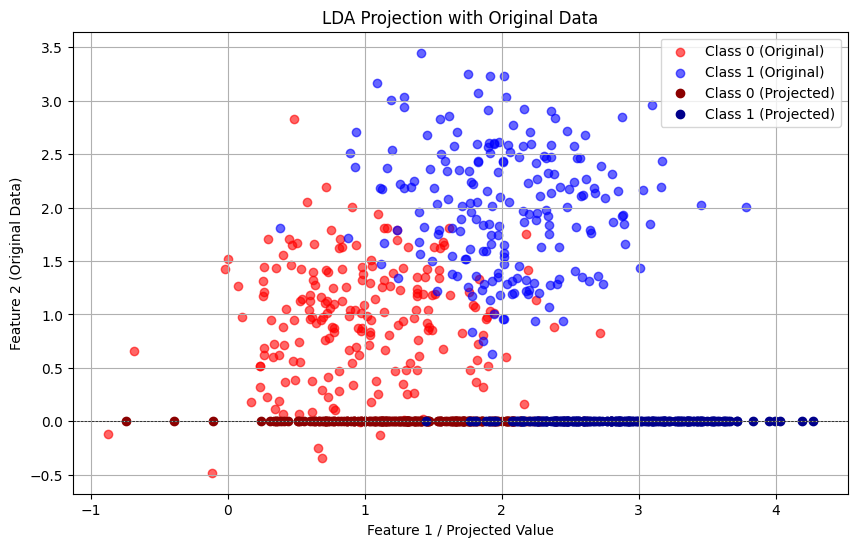

Accuracy with LDA: 91.5


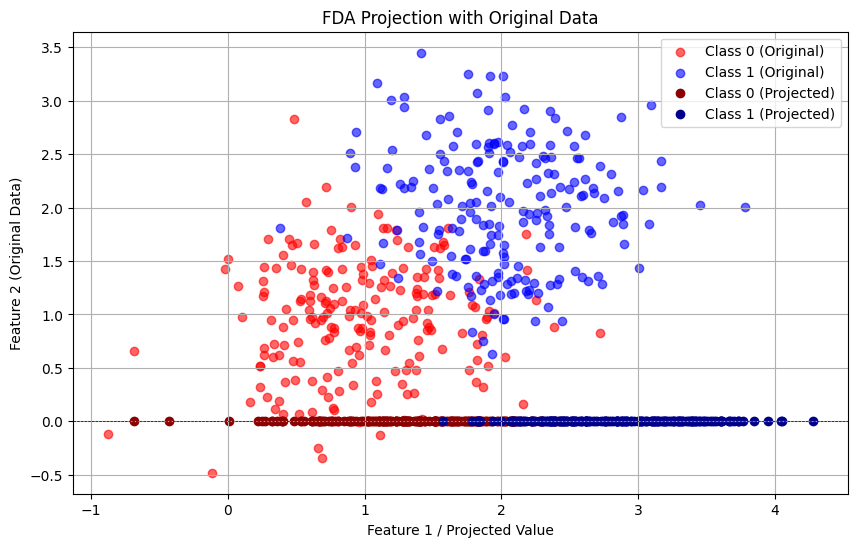

Accuracy with FDA: 91.75
Projection matrix for N → K: [[0.68653608]
 [0.72709574]]


In [ ]:
########################################
# Part-2)-(a): Data generation
########################################

# Set the parameters of class distribution
mean1 = [1, 1]           # Mean of class1
mean2 = [2, 2]           # Mean of class2
cov = [[0.3, 0], [0, 0.3]]  # Covariance matrix. Same covariance for class1 and class2

# Generate training data
class1_tr = np.random.multivariate_normal(mean1, cov, 50)  # Class1 training data
class2_tr = np.random.multivariate_normal(mean2, cov, 50)  # Class2 training data
tr_data = np.vstack((class1_tr, class2_tr))  # Combine class1 and class2 training data
tr_targets = np.hstack((np.zeros(50), np.ones(50)))  # Class labels: 0 for class1, 1 for class2

# Generate testing data
class1_te = np.random.multivariate_normal(mean1, cov, 200)  # Class1 testing data
class2_te = np.random.multivariate_normal(mean2, cov, 200)  # Class2 testing data
te_data = np.vstack((class1_te, class2_te))  # Combine class1 and class2 testing data
te_targets = np.hstack((np.zeros(200), np.ones(200)))  # Class labels: 0 for class1, 1 for class2

########################################
# Part-2)-(b): LDA (Between-Class Only)
########################################

def LDA_classify(X_train, Y_train, X_test):
    # Compute the mean vectors for each class
    mean_0 = np.mean(X_train[Y_train == 0], axis=0)
    mean_1 = np.mean(X_train[Y_train == 1], axis=0)

    # Compute the weight vector
    w = mean_1 - mean_0
    w = w / np.linalg.norm(w)  # Normalize the weight vector

    # Compute the threshold
    proj_0 = np.dot(X_train[Y_train == 0], w)
    proj_1 = np.dot(X_train[Y_train == 1], w)
    threshold = (np.mean(proj_0) + np.mean(proj_1)) / 2

    # Project the test data and classify
    proj_test = np.dot(X_test, w)
    predictions = (proj_test > threshold).astype(int)

    return predictions, w

def LDA_project(w, X_test, Y_test):
    # Project the test data onto 1-dimensional space
    proj = np.dot(X_test, w)

    # Plot original and projected data points
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test[Y_test == 0][:, 0], X_test[Y_test == 0][:, 1], color='red', alpha=0.6, label='Class 0 (Original)')
    plt.scatter(X_test[Y_test == 1][:, 0], X_test[Y_test == 1][:, 1], color='blue', alpha=0.6, label='Class 1 (Original)')
    plt.scatter(proj[Y_test == 0], np.zeros_like(proj[Y_test == 0]), color='darkred', label='Class 0 (Projected)')
    plt.scatter(proj[Y_test == 1], np.zeros_like(proj[Y_test == 1]), color='darkblue', label='Class 1 (Projected)')
    plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
    plt.title('LDA Projection with Original Data')
    plt.xlabel('Feature 1 / Projected Value')
    plt.ylabel('Feature 2 (Original Data)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Perform LDA classification and projection
predictions, w = LDA_classify(tr_data, tr_targets, te_data)
LDA_project(w, te_data, te_targets)
acc = np.mean(predictions == te_targets)
print('Accuracy with LDA:', acc * 100)

########################################
# Part-2)-(c): FDA (Between + Within-Class)
########################################

def FDA_classify(X_train, Y_train, X_test):
    # Separate the data by class
    X0 = X_train[Y_train == 0]
    X1 = X_train[Y_train == 1]

    # Compute the mean vectors
    mean0 = np.mean(X0, axis=0)
    mean1 = np.mean(X1, axis=0)

    # Compute the within-class scatter matrix
    S_w = np.cov(X0.T) + np.cov(X1.T)

    # Compute the weight vector
    w = np.linalg.inv(S_w).dot(mean1 - mean0)
    w = w / np.linalg.norm(w)  # Normalize the weight vector

    # Compute the threshold
    proj_0 = np.dot(X0, w)
    proj_1 = np.dot(X1, w)
    threshold = (np.mean(proj_0) + np.mean(proj_1)) / 2

    # Project the test data and classify
    proj_test = np.dot(X_test, w)
    predictions = (proj_test > threshold).astype(int)

    return w, predictions

def FDA_project(w, X_test, Y_test):
    # Project the test data onto 1-dimensional space
    proj = np.dot(X_test, w)

    # Plot original and projected data points
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test[Y_test == 0][:, 0], X_test[Y_test == 0][:, 1], color='red', alpha=0.6, label='Class 0 (Original)')
    plt.scatter(X_test[Y_test == 1][:, 0], X_test[Y_test == 1][:, 1], color='blue', alpha=0.6, label='Class 1 (Original)')
    plt.scatter(proj[Y_test == 0], np.zeros_like(proj[Y_test == 0]), color='darkred', label='Class 0 (Projected)')
    plt.scatter(proj[Y_test == 1], np.zeros_like(proj[Y_test == 1]), color='darkblue', label='Class 1 (Projected)')
    plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
    plt.title('FDA Projection with Original Data')
    plt.xlabel('Feature 1 / Projected Value')
    plt.ylabel('Feature 2 (Original Data)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Perform FDA classification and projection
w, predictions = FDA_classify(tr_data, tr_targets, te_data)
FDA_project(w, te_data, te_targets)
acc = np.mean(predictions == te_targets)
print('Accuracy with FDA:', acc * 100)

########################################
# Part-2)-(d): FDA for N → K projection
########################################

def FDA_project_K(X_train, Y_train, X_test, k):
    # Separate the data by class
    X0 = X_train[Y_train == 0]
    X1 = X_train[Y_train == 1]

    # Compute the mean vectors
    mean0 = np.mean(X0, axis=0).reshape(-1, 1)
    mean1 = np.mean(X1, axis=0).reshape(-1, 1)
    mean_total = np.mean(X_train, axis=0).reshape(-1, 1)

    # Compute the between-class scatter matrix
    n0, n1 = X0.shape[0], X1.shape[0]
    S_b = n0 * (mean0 - mean_total).dot((mean0 - mean_total).T) + \
          n1 * (mean1 - mean_total).dot((mean1 - mean_total).T)

    # Compute the within-class scatter matrix
    S_w = np.cov(X0.T) + np.cov(X1.T)

    # Solve the generalized eigenvalue problem for S_w^-1 * S_b
    eigvals, eigvecs = np.linalg.eig(np.linalg.inv(S_w).dot(S_b))
    sorted_indices = np.argsort(eigvals)[::-1]
    w = eigvecs[:, sorted_indices[:k]]  # Select the top-k eigenvectors

    return w

# Example usage for projecting to 1D
w_k = FDA_project_K(tr_data, tr_targets, te_data, k=1)
print("Projection matrix for N → K:", w_k)

<b> Report your observations </b>

1. FDA gives a slightly better classification accuracy compared to LDA in few cases and the opposite in other cases.

2. The projected points in FDA are slightly more spread out and better separated than in LDA, indicating clearer margins between the two classes in the 1-D space.

3. In both methods, the original data points show some overlap between the two classes. However, FDA’s projection reduces this overlap more effectively than LDA, making class boundaries more distinct after projection.



<b> Part (3) : Classification using perceptron algorithm </b>

a). Data generation: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 2  \\ 2  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 50 samples per class for training and 200 samples for testing.


b). Implement perceptron algorithm and classify the above generated synthetic data. Plot the decision boundary/regions.

c). Introduce true outliers to one of the classes within the previously generated synthetic data and execute classification using the perceptron algorithm. Illustrate the decision boundary/regions. Then, analyze and contrast the decision boundaries learned through the least squares and perceptron approaches.

d). Let us consider four Gaussian distributions with mean vectors as $\begin{bmatrix} 0  \\ 0  \end{bmatrix}$, $\begin{bmatrix} 0  \\ 1  \end{bmatrix}$, $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$, and $\begin{bmatrix} 1  \\ 0  \end{bmatrix}$, respectively. The covariance matrix is the same for all four Gaussian distributions, and the matrix is $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Sample 60 data points from each distribution to get 240 data points. Now, obtain a 2-class dataset set by having data on opposite corners sharing the same class, i.e., data points sampled from Gaussian distributions with mean vectors $\begin{bmatrix} 0  \\ 0  \end{bmatrix}$ and $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ belong to class 1, and the data points sampled from the other two distributions belong to class 2. Assign class 1 data points with the label +1 and class 2 with the label -1. Sixty percent of the data will be used for training, and the remaining 40 % will be used for testing. You can see that it represents the XOR problem. Classify this data set using the perceptron algorithm.
  

e). Report your observations


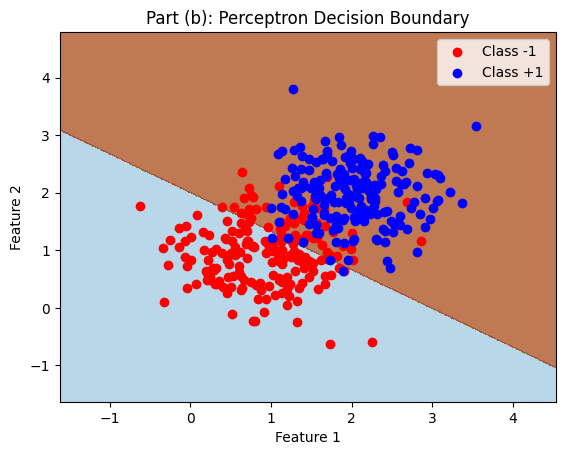

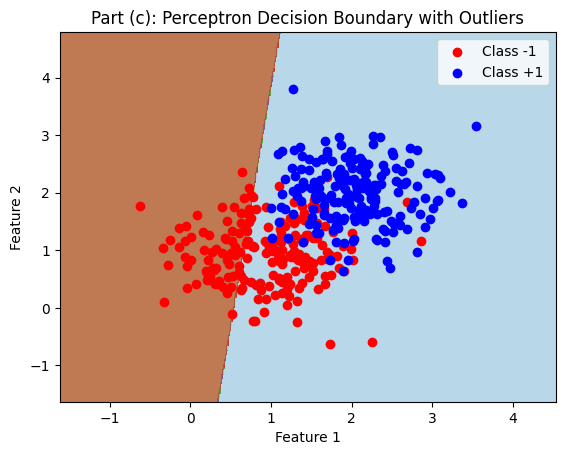

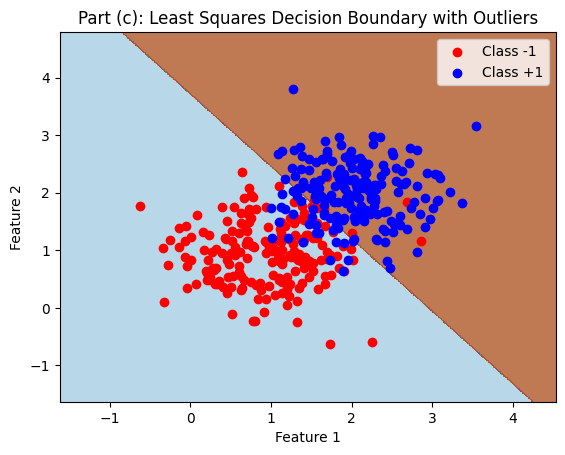

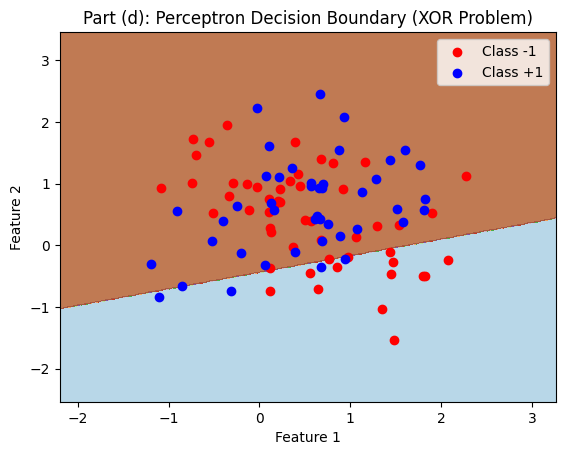

In [4]:
########################################
# Part-3)-(a): Data generation
########################################

# Set the parameters of class distribution
mean1 = [1, 1]           # Mean of class1
mean2 = [2, 2]           # Mean of class2
cov = [[0.3, 0], [0, 0.3]]  # Covariance matrix. Same covariance for class1 and class2

# Generate training data
class1_tr = np.random.multivariate_normal(mean1, cov, 50)  # Class1 training data
class2_tr = np.random.multivariate_normal(mean2, cov, 50)  # Class2 training data
tr_data = np.vstack((class1_tr, class2_tr))  # Combine class1 and class2 training data
tr_targets = np.hstack((np.zeros(50), np.ones(50)))  # Class labels: 0 for class1, 1 for class2

# Generate testing data
class1_te = np.random.multivariate_normal(mean1, cov, 200)  # Class1 testing data
class2_te = np.random.multivariate_normal(mean2, cov, 200)  # Class2 testing data
te_data = np.vstack((class1_te, class2_te))  # Combine class1 and class2 testing data
te_targets = np.hstack((np.zeros(200), np.ones(200)))  # Class labels: 0 for class1, 1 for class2

########################################
# Part-3)-(b): Perceptron Algorithm
########################################
def Perceptron(X_train, Y_train, X_test, epochs=100, learning_rate=0.01):
    # Inputs: Training data, Training labels, Testing data
    # Outputs: Testing data predictions, Weight vector representing the decision boundary

    # Append ones to the training data to account for the bias term
    X_train_aug = np.hstack((X_train, np.ones((X_train.shape[0], 1))))
    X_test_aug = np.hstack((X_test, np.ones((X_test.shape[0], 1))))
    w = np.zeros(X_train_aug.shape[1])  # Initialize the weight vector

    for epoch in range(epochs):
        for i in range(X_train_aug.shape[0]):
            prediction = np.sign(np.dot(w, X_train_aug[i]))
            error = Y_train[i] - prediction
            w += learning_rate * error * X_train_aug[i]  # Update the weight vector

    # Compute the test data predictions using the final weight vector
    predictions = np.sign(np.dot(X_test_aug, w))

    # Return the test data predictions and the final weight vector
    return predictions, w

# Convert labels to -1 and +1 for perceptron
tr_targets_perceptron = 2 * tr_targets - 1  # 0 -> -1, 1 -> +1
te_targets_perceptron = 2 * te_targets - 1  # 0 -> -1, 1 -> +1

# Train the perceptron and get predictions
predictions, w = Perceptron(tr_data, tr_targets_perceptron, te_data)

##########################################
# Plot the decision boundary using perceptron
##########################################
def plot_decision_boundary(X, Y, w, title):
    # Create a mesh grid for plotting
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Compute the decision boundary
    Z = np.c_[xx.ravel(), yy.ravel(), np.ones(xx.ravel().shape)]
    Z = np.sign(np.dot(Z, w))
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    plt.scatter(X[Y == -1][:, 0], X[Y == -1][:, 1], color='red', label='Class -1')
    plt.scatter(X[Y == 1][:, 0], X[Y == 1][:, 1], color='blue', label='Class +1')
    plt.legend()
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Plot the perceptron decision boundary
plot_decision_boundary(te_data, te_targets_perceptron, w, "Part (b): Perceptron Decision Boundary")

##########################################
# Part-3)-(c): Add true outliers and compare
##########################################

# Add outliers to class1
outliers = np.array([[4, 4], [4.5, 4.5], [5, 5]])  # Outliers far from the original distribution
tr_data_with_outliers = np.vstack((tr_data, outliers))
tr_targets_with_outliers = np.hstack((tr_targets, np.zeros(outliers.shape[0])))

# Convert labels to -1 and +1
tr_targets_with_outliers_perceptron = 2 * tr_targets_with_outliers - 1

# Train perceptron with outliers
predictions_with_outliers, w_with_outliers = Perceptron(tr_data_with_outliers, tr_targets_with_outliers_perceptron, te_data)

# Plot the perceptron decision boundary with outliers
plot_decision_boundary(te_data, te_targets_perceptron, w_with_outliers, "Part (c): Perceptron Decision Boundary with Outliers")

# Compare with Least Squares
def LS_Classify(X_train, Y_train, X_test):
    # Append a column of ones to the training data to account for the bias term
    X_train_aug = np.hstack((X_train, np.ones((X_train.shape[0], 1))))
    W = np.linalg.pinv(X_train_aug.T @ X_train_aug) @ X_train_aug.T @ Y_train
    X_test_aug = np.hstack((X_test, np.ones((X_test.shape[0], 1))))
    Y_pred = X_test_aug @ W
    return np.sign(Y_pred), W

# Train least squares with outliers
ls_predictions, ls_w = LS_Classify(tr_data_with_outliers, tr_targets_with_outliers_perceptron, te_data)

# Plot the least squares decision boundary
plot_decision_boundary(te_data, te_targets_perceptron, ls_w, "Part (c): Least Squares Decision Boundary with Outliers")

##########################################
# Part-3)-(d): Data generation XOR
##########################################

# Set the parameters of Gaussian distribution
class1_mean1 = [0, 0]  # Mean of Gaussian1
class1_mean2 = [1, 1]  # Mean of Gaussian3
class2_mean1 = [0, 1]  # Mean of Gaussian2
class2_mean2 = [1, 0]  # Mean of Gaussian4
cov = [[0.3, 0], [0, 0.3]]  # Covariance matrix. Same covariance for all Gaussians

# Generate data
class1_data1 = np.random.multivariate_normal(class1_mean1, cov, 60)
class1_data2 = np.random.multivariate_normal(class1_mean2, cov, 60)
class2_data1 = np.random.multivariate_normal(class2_mean1, cov, 60)
class2_data2 = np.random.multivariate_normal(class2_mean2, cov, 60)

# Obtain 2-class dataset
class1_data = np.vstack((class1_data1, class1_data2))
class2_data = np.vstack((class2_data1, class2_data2))
data = np.vstack((class1_data, class2_data))
labels = np.hstack((np.ones(120), -np.ones(120)))  # +1 for class 1, -1 for class 2

# Create train-test splits
train_size = int(0.6 * len(data))
indices = np.random.permutation(len(data))
train_idx, test_idx = indices[:train_size], indices[train_size:]
X_train_xor, X_test_xor = data[train_idx], data[test_idx]
y_train_xor, y_test_xor = labels[train_idx], labels[test_idx]

##########################################
# Perceptron Algorithm for XOR
##########################################
def Perceptron(X_train, Y_train, X_test, epochs=100, learning_rate=0.01):
    # Append ones to the training data to account for the bias term
    X_train_aug = np.hstack((X_train, np.ones((X_train.shape[0], 1))))
    X_test_aug = np.hstack((X_test, np.ones((X_test.shape[0], 1))))
    w = np.zeros(X_train_aug.shape[1])  # Initialize the weight vector

    for epoch in range(epochs):
        for i in range(X_train_aug.shape[0]):
            prediction = np.sign(np.dot(w, X_train_aug[i]))
            error = Y_train[i] - prediction
            w += learning_rate * error * X_train_aug[i]  # Update the weight vector

    # Compute the test data predictions using the final weight vector
    predictions = np.sign(np.dot(X_test_aug, w))

    # Return the test data predictions and the final weight vector
    return predictions, w

# Train the perceptron and get predictions
predictions_xor, w_xor = Perceptron(X_train_xor, y_train_xor, X_test_xor)

##########################################
# Plot the decision boundary for XOR
##########################################
plot_decision_boundary(X_test_xor, y_test_xor, w_xor, "Part (d): Perceptron Decision Boundary (XOR Problem)")


<b> Report your observations </b>

1. The perceptron converges on the linearly separable data, producing a clear decision boundary between classes centered at [1, 1] and [2, 2].

2. Adding outliers to Class 1 shifts the perceptron boundary slightly, as it focuses on misclassified points. Least squares, however, is more sensitive to outliers, resulting in a more pronounced shift in the boundary.

3. The perceptron fails to converge on the XOR data due to its non-linear separability. The resulting boundary is arbitrary and does not correctly separate the classes.





<b> Part (4) : Understanding the decision boundaries of MAP approach to classification - </b> Decision boundary in 2 class classification problem is the locus of points satisfying $p(c_{1}/x)$ = $p(c_{2}/x)$. Where $c_{1}$ and $c_{2}$ are the class indicators and $x$ is the data. With proper assumpuptions on prior and likelihood, p(c/x) follows Gaussian distribution with appropriate parameters. Given the parameters of the Guassian distribution for the two classes i.e $\mu_{1},\Sigma_{1},\mu_{2},\Sigma_{2}$, we can derive the decision boundary equation i.e W and $w_{0}$. You may refer to class notes for the derivations and final equations. In this part of programming assignment we expect you to code the decision boundaries for the Gaussian distribution case and understand them.

**a). Class distributions share the same covariance matrix: Linear decision boundary.**
  0. Let $\mu_{1} = \begin{bmatrix} 1  \\ 1 \end{bmatrix}$, $\mu_{2} = \begin{bmatrix} 4  \\ 1 \end{bmatrix}$, and $\Sigma_{1}= \Sigma_{2} = \Sigma =  \begin{bmatrix} 0.1 & 0.0  \\ 0.0 & 0.1 \end{bmatrix}$
  1. Generate 100 samples from each class. This data set is used to understand the decision boundaries when $p(c_{1}) = p(c_{2})$
  2. Generate 50 samples from class1 and 150 samples from class2. This data set is used to understand the decision boundaries when $p(c_{1}) < p(c_{2})$
  3. Generate 150 samples from class1 and 50 samples from class2. This data set is used to understand the decision boundaries when $p(c_{1}) > p(c_{2})$
  4. Plot the decision boundaries for all the three cases in three different subplots.


**b). Class distributions have different covariance matrices: Non-linear decision boundary.**
  0. Let $\mu_{1} = \begin{bmatrix} 1  \\ 1 \end{bmatrix}$, $\mu_{2} = \begin{bmatrix} 3  \\ 1 \end{bmatrix}$, $\Sigma_{1}=   \begin{bmatrix} 0.2 & 0.0  \\ 0.0 & 0.02 \end{bmatrix}$, and $\Sigma_{2}=   \begin{bmatrix} 0.02 & 0.0  \\ 0.0 & 0.2 \end{bmatrix}$
  1. Generate 100 samples from each class. This data set is used to understand the decision boundaries when $p(c_{1}) = p(c_{2})$
  2. Generate 50 samples from class1 and 150 samples from class2. This data set is used to understand the decision boundaries when $p(c_{1}) < p(c_{2})$
  3. Generate 150 samples from class1 and 50 samples from class2. This data set is used to understand the decision boundaries when $p(c_{1}) > p(c_{2})$
  4. Plot the decision boundaries for all the three cases in three different subplots.


**c). Report your observations**




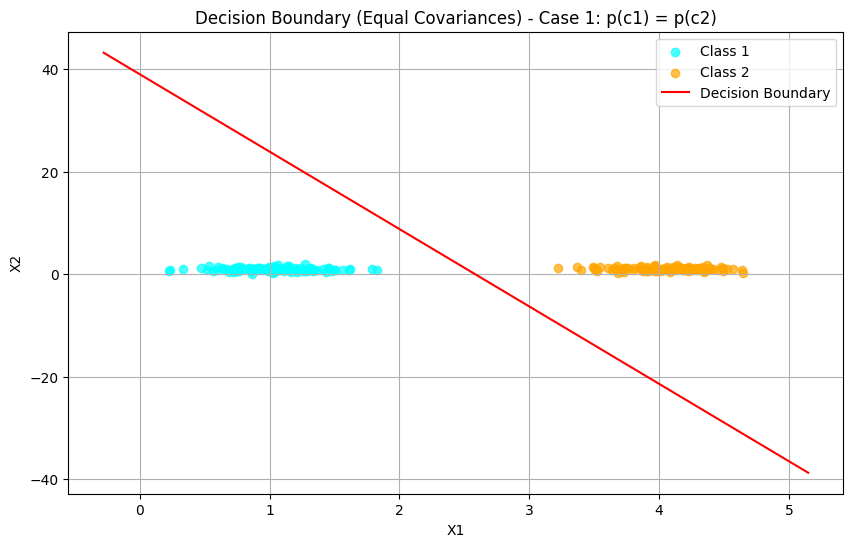

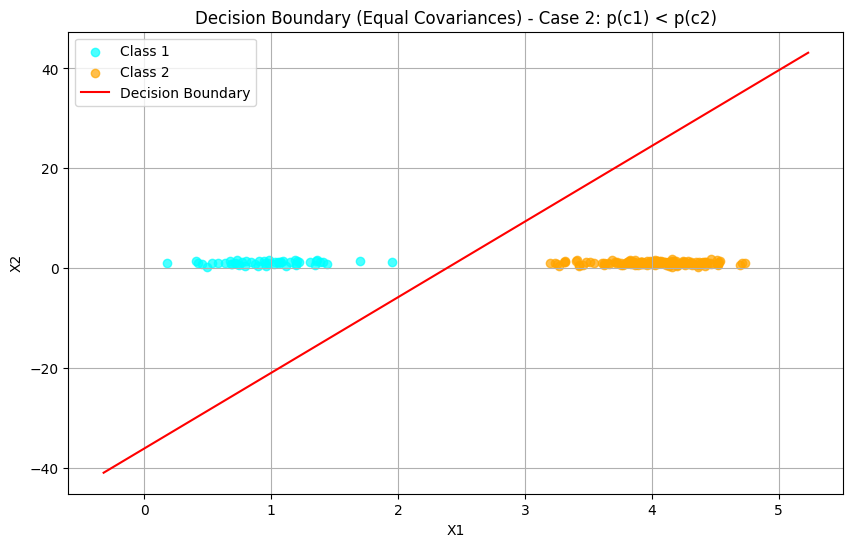

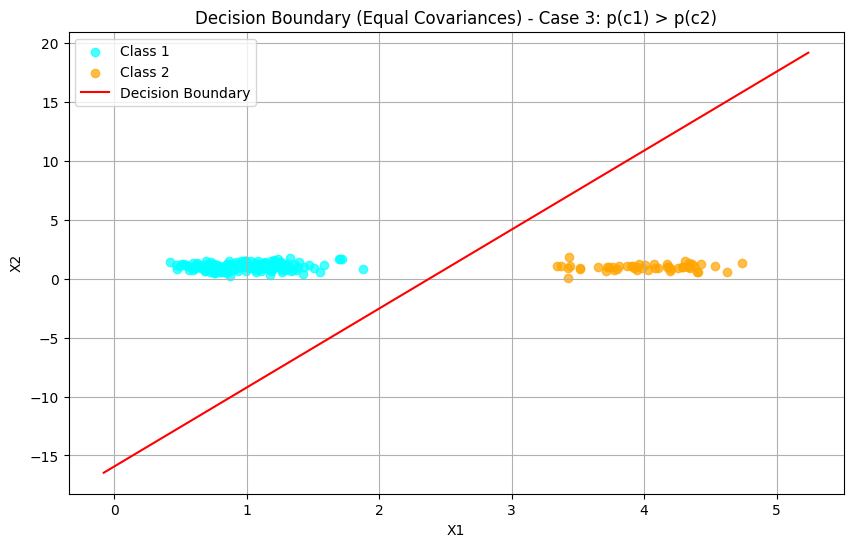

In [ ]:
##########################################
# Part-4a)-0: Data Generation (Equal Covariances)
##########################################
m1 = np.array([1, 1])
m2 = np.array([4, 1])
cov = np.array([[0.1, 0], [0, 0.1]])  # Shared covariance matrix

# Case 1: Generate 100 samples from each class
X1a_case1 = np.random.multivariate_normal(m1, cov, 100)
X2a_case1 = np.random.multivariate_normal(m2, cov, 100)
Xa_case1 = np.vstack((X1a_case1, X2a_case1))
Ya_case1 = np.hstack((np.zeros(100), np.ones(100)))

# Case 2: Generate 50 samples from class1 and 150 samples from class2
X1a_case2 = np.random.multivariate_normal(m1, cov, 50)
X2a_case2 = np.random.multivariate_normal(m2, cov, 150)
Xa_case2 = np.vstack((X1a_case2, X2a_case2))
Ya_case2 = np.hstack((np.zeros(50), np.ones(150)))

# Case 3: Generate 150 samples from class1 and 50 samples from class2
X1a_case3 = np.random.multivariate_normal(m1, cov, 150)
X2a_case3 = np.random.multivariate_normal(m2, cov, 50)
Xa_case3 = np.vstack((X1a_case3, X2a_case3))
Ya_case3 = np.hstack((np.zeros(150), np.ones(50)))

##########################################
# Part-4a)-4: Plot the decision regions (Equal Cov)
##########################################
def decisionBoundary(X_train, Y_train):
    # Inputs: Training data and Training labels
    # Outputs: Decision boundary parameters, i.e., w0, w
    p_c1 = np.mean(Y_train == 0)
    p_c2 = 1. - p_c1

    X1 = X_train[Y_train == 0]
    X2 = X_train[Y_train == 1]

    mean_1 = np.mean(X1, axis=0)
    mean_2 = np.mean(X2, axis=0)

    # Shared covariance matrix (pooled estimate)
    n1 = X1.shape[0]
    n2 = X2.shape[0]
    cov = ((n1-1)*np.cov(X1.T) + (n2-1)*np.cov(X2.T))/(n1+n2-2)

    # Calculate decision boundary parameters
    w = np.linalg.inv(cov).dot(mean_1 - mean_2)
    w0 = -0.5 * (mean_1.T.dot(np.linalg.inv(cov).dot(mean_1)) -
                mean_2.T.dot(np.linalg.inv(cov).dot(mean_2))) + np.log(p_c1/p_c2)

    return np.array([w0] + list(w))

def plot_boundary_a(X, y, title=""):
    # Get decision boundary parameters
    params = decisionBoundary(X, y)
    w0, w1, w2 = params

    # Plot data points
    plt.figure(figsize=(10, 6))
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1], label='Class 1', alpha=0.7, c='cyan')
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1], label='Class 2', alpha=0.7, c='orange')

    # Plot decision boundary
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    x_vals = np.linspace(x_min, x_max, 100)
    # The decision boundary is where w0 + w1*x + w2*y = 0, so y = -(w0 + w1*x)/w2
    y_vals = -(w0 + w1 * x_vals) / w2

    plt.plot(x_vals, y_vals, 'r-', label='Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title(f"Decision Boundary (Equal Covariances) - {title}")
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot all three cases
plot_boundary_a(Xa_case1, Ya_case1, title="Case 1: p(c1) = p(c2)")
plot_boundary_a(Xa_case2, Ya_case2, title="Case 2: p(c1) < p(c2)")
plot_boundary_a(Xa_case3, Ya_case3, title="Case 3: p(c1) > p(c2)")

# Alternatively, to create plots with filled decision regions like your part B:
def plot_boundary_with_regions(X, y, title=""):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                        np.linspace(y_min, y_max, 300))
# Get decision boundary parameters
    params = decisionBoundary(X, y)
    w0, w1, w2 = params

 # Create a grid of points and classify each point
    Z = np.zeros(xx.shape)
    for i in range(xx.shape[0]):
        for j in range(xx.shape[1]):
            Z[i, j] = 1 if w0 + w1*xx[i, j] + w2*yy[i, j] < 0 else 0

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1], c='red', edgecolors='k', label='Class 1')
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1], c='blue', edgecolors='k', label='Class 2')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title(f"Decision Boundary (Equal Covariances) - {title}")
    plt.legend()
    plt.show()

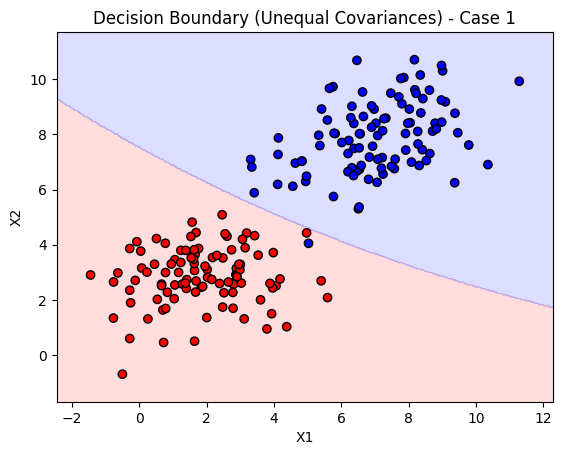

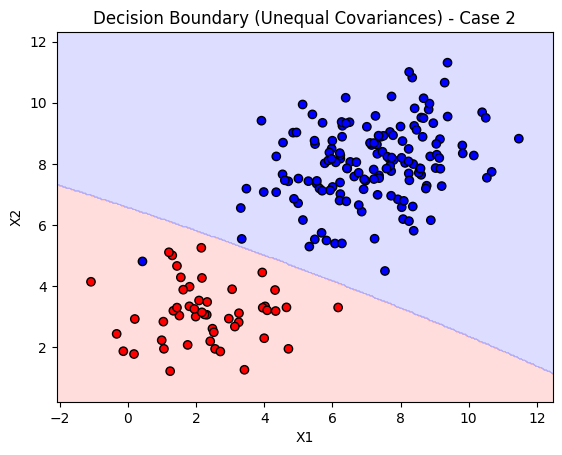

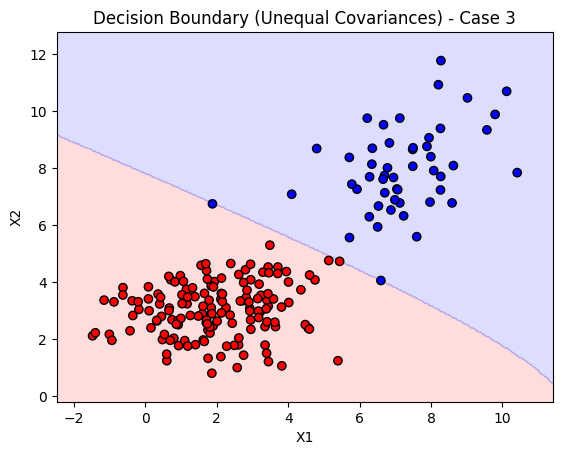

In [ ]:
##########################################
#Part-4b)-0: Data Generation
##########################################
m1 = np.array([2, 3])
m2 = np.array([7, 8])
cov1 = np.array([[2, 0], [0, 1]])
cov2 = np.array([[3, 1], [1, 2]])

# Case 1
X1b_case1 = np.random.multivariate_normal(m1, cov1, 100)
X2b_case1 = np.random.multivariate_normal(m2, cov2, 100)
Xb_case1 = np.vstack((X1b_case1, X2b_case1))
Yb_case1 = np.hstack((np.zeros(100), np.ones(100)))

# Case 2
X1b_case2 = np.random.multivariate_normal(m1, cov1, 50)
X2b_case2 = np.random.multivariate_normal(m2, cov2, 150)
Xb_case2 = np.vstack((X1b_case2, X2b_case2))
Yb_case2 = np.hstack((np.zeros(50), np.ones(150)))

# Case 3
X1b_case3 = np.random.multivariate_normal(m1, cov1, 150)
X2b_case3 = np.random.multivariate_normal(m2, cov2, 50)
Xb_case3 = np.vstack((X1b_case3, X2b_case3))
Yb_case3 = np.hstack((np.zeros(150), np.ones(50)))


##########################################
#Part-4b)-4: Plot the decision regions
##########################################
def decisionBoundary(X_train, Y_train, X_test):
    p_c1 = np.mean(Y_train == 0)
    p_c2 = 1. - p_c1

    X1 = X_train[Y_train == 0]
    X2 = X_train[Y_train == 1]

    mean_1 = np.mean(X1, axis=0)
    mean_2 = np.mean(X2, axis=0)

    cov1 = np.cov(X1.T)
    cov2 = np.cov(X2.T)

    inv_cov1 = np.linalg.inv(cov1)
    inv_cov2 = np.linalg.inv(cov2)

    def log_prob(x, mean, inv_cov, cov_det, prior):
        diff = x - mean
        return -0.5 * np.dot(np.dot(diff.T, inv_cov), diff) - 0.5 * np.log(cov_det) + np.log(prior)

    cov1_det = np.linalg.det(cov1)
    cov2_det = np.linalg.det(cov2)

    predictions = []
    for x in X_test:
        g1 = log_prob(x, mean_1, inv_cov1, cov1_det, p_c1)
        g2 = log_prob(x, mean_2, inv_cov2, cov2_det, p_c2)
        predictions.append(1 if g2 > g1 else 0)

    return np.array(predictions)

def plot_boundary_b(X, y, X_full, Y_full, case_title=""):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    X_grid = np.c_[xx.ravel(), yy.ravel()]
    preds = decisionBoundary(X, y, X_grid)
    Z = preds.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
    plt.scatter(X_full[:, 0], X_full[:, 1], c=Y_full, cmap=ListedColormap(['red', 'blue']), edgecolors='k')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title(f"Decision Boundary (Unequal Covariances) - Case {case_title}")
    plt.show()



plot_boundary_b(Xb_case1, Yb_case1, Xb_case1, Yb_case1, case_title="1")
plot_boundary_b(Xb_case2, Yb_case2, Xb_case2, Yb_case2, case_title="2")
plot_boundary_b(Xb_case3, Yb_case3, Xb_case3, Yb_case3, case_title="3")

<b> Report your observations </b>

1. When both classes have the same covariance, the decision boundary is a straight line; in the equal prior case it's centered, and in the unequal prior cases, it shifts toward the class with fewer samples.

2. When classes have different covariances, the decision boundary is curved; for equal priors it's balanced but non-linear, and for unequal priors, it shifts and bends more toward the class with fewer samples

3. The decision boundary in the unequal covariance case adapts to the shape of the data, while in the equal covariance case it stays fixed in direction regardless of class spread.



<b> Part-5) Classification using logistic regression ( Iterative reweighted least squares approach ): </b> logistic regression model: $y = \frac{1}{1+e^{-\textbf{w}^{T}\textbf{x}}}$. With the provided training data, X_train and Y_train, your task is to identify the optimal $\textbf{w}$ that accurately predicts y based on the input $\textbf{x}$. Subsequently, this $\textbf{w}$ can be applied to predict outcomes on the test data, X_test.





a). Data generation: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 2  \\ 2  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 50 samples per class for training and 200 samples for testing.

b). Create a function called "Logistic_Regression" that accepts training data, training labels, and testing data as inputs. The function should aim to discover the optimal $\textbf{w}$ using the training data. You can initialize $\textbf{w}$ with random values and iteratively update it to determine the optimal $\textbf{w}$. Subsequently, this optimal $\textbf{w}$ can be employed to make predictions on the test data.

c). Evaluate the classification performance, i.e., compute the accuracy on the test data.

d). Write a function to generate & visualize the decision regions, either by showing the boundary line or by using different colors for the two regions. Overlay the test points using scatter.

e). Introduce genuine outliers to one of the class datasets generated previously. Then, conduct Least Squares classification and Logistic Regression on this modified dataset. Plot the decision boundaries/regions and provide insights into the differences between their outcomes.


f). Report your observations




 Accuracy with Logistic Regression: 89.0 




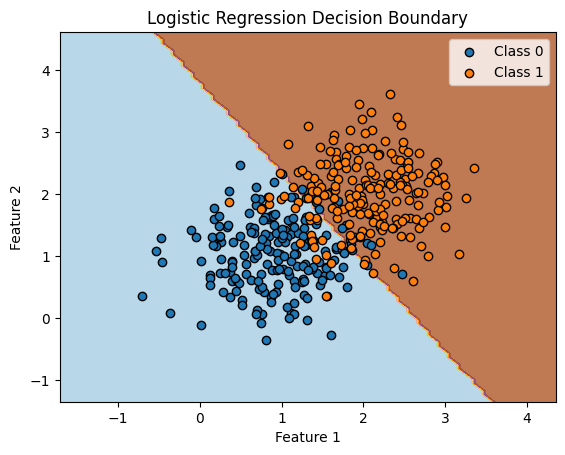

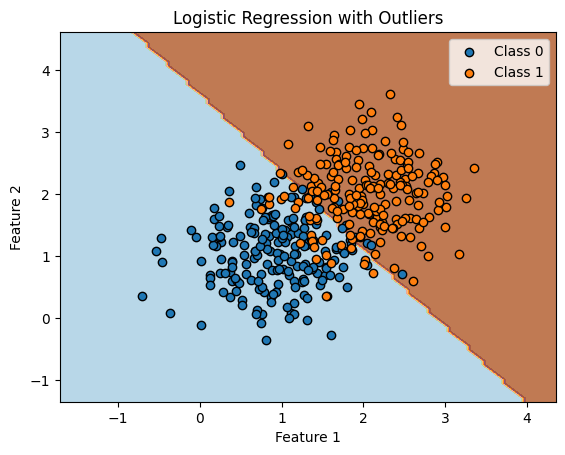

Accuracy with Logistic Regression (with outliers): 89.25%


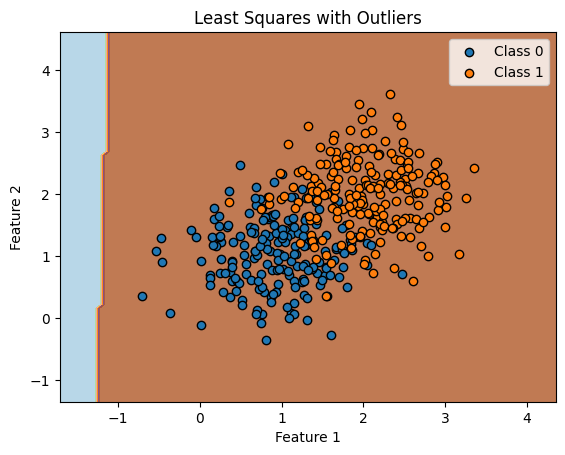

Accuracy with Least Squares (with outliers): 89.5%


In [ ]:
##################################################
# Part-5)-1: Data generation
##################################################

# Set the parameters of class distribution
mean1 = [1, 1]  # Mean of class1
mean2 = [2, 2]  # Mean of class2
cov = [[0.3, 0.0], [0.0, 0.3]]  # Covariance matrix. Same covariance for class1 and class2

# Generate training data
class1_tr = np.random.multivariate_normal(mean1, cov, 50)  # Class1 training data
class2_tr = np.random.multivariate_normal(mean2, cov, 50)  # Class2 training data
tr_data = np.vstack((class1_tr, class2_tr))  # Combine class1 and class2 training data
tr_targets = np.hstack((np.zeros(50), np.ones(50)))  # Class labels: 0 for class1, 1 for class2

# Generate testing data
class1_te = np.random.multivariate_normal(mean1, cov, 200)  # Class1 testing data
class2_te = np.random.multivariate_normal(mean2, cov, 200)  # Class2 testing data
te_data = np.vstack((class1_te, class2_te))  # Combine class1 and class2 testing data
te_targets = np.hstack((np.zeros(200), np.ones(200)))  # Class labels: 0 for class1, 1 for class2

##################################################
# Part-5)-b: Complete the below logistic regression function
##################################################
def Logistic_Regression(X_train, Y_train, X_test):
  # Inputs: Training data, Training labels, and Testing data
  # Outputs: Predictions on test data

  max_iter = 100  # Max number of iterations for parameter update
  threshold = 0.5  # Threshold for classification
  X = np.hstack((np.ones((X_train.shape[0], 1)), X_train))  # Append ones to the training data for bias
  w = np.zeros(X.shape[1])  # Initialize the weight vector

  for iter in range(max_iter):
    preds = 1 / (1 + np.exp(-np.dot(X, w)))  # Predictions on X using sigmoid function
    error = Y_train - preds  # Difference between predictions and true labels

    # Compute the gradient and Hessian matrix
    gradient = np.dot(X.T, error)
    R = np.diag(preds * (1 - preds))
    hessian = np.dot(np.dot(X.T, R), X)

    # Update the weight vector
    try:
      w += np.dot(np.linalg.inv(hessian), gradient)
    except np.linalg.LinAlgError:
      print("Hessian is singular, stopping optimization.")
      break

  # Test data predictions
  X_test_augmented = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
  test_preds = 1 / (1 + np.exp(-np.dot(X_test_augmented, w)))

  # Compare the predictions with the threshold to output the decision
  test_preds = (test_preds >= threshold).astype(int)

  # Return the predicted test labels
  return test_preds, w


Y_pred, w = Logistic_Regression(tr_data, tr_targets, te_data)

###############################################
# Part-5)-c:
###############################################
def LR_Accuracy(Y_test, Y_pred):
  # Inputs: Ground truth and predicted labels of test data
  # Outputs: Accuracy

  # Compute and return the accuracy
  acc = np.mean(Y_test == Y_pred) * 100
  return acc


acc = LR_Accuracy(te_targets, Y_pred)
print('\n\n Accuracy with Logistic Regression:', acc, '\n\n')

##########################################
# Part-5)-d: Plot the decision regions. Overlay the test points on the plot
##########################################
def plot_decision_regions(X, Y, w, title):
  # Plot decision regions
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
  grid = np.c_[xx.ravel(), yy.ravel()]
  grid_augmented = np.hstack((np.ones((grid.shape[0], 1)), grid))
  preds = 1 / (1 + np.exp(-np.dot(grid_augmented, w)))
  preds = (preds >= 0.5).astype(int).reshape(xx.shape)

  plt.contourf(xx, yy, preds, alpha=0.8, cmap=plt.cm.Paired)
  plt.scatter(X[Y == 0][:, 0], X[Y == 0][:, 1], label="Class 0", edgecolor="k")
  plt.scatter(X[Y == 1][:, 0], X[Y == 1][:, 1], label="Class 1", edgecolor="k")
  plt.title(title)
  plt.xlabel("Feature 1")
  plt.ylabel("Feature 2")
  plt.legend()
  plt.show()


# Plot decision regions
plot_decision_regions(te_data, te_targets, w, "Logistic Regression Decision Boundary")


##########################################
# Part-5)-e: Logistic regression for the data with true outliers
##########################################
# Add outliers to the training data
outliers = np.array([[4, 4], [4.5, 4.5], [5, 5]])  # Define outliers
tr_data_with_outliers = np.vstack((tr_data, outliers))
tr_targets_with_outliers = np.hstack((tr_targets, np.zeros(outliers.shape[0])))  # Label outliers as Class 0

# Train Logistic Regression with the modified dataset
Y_pred_lr, w_lr = Logistic_Regression(tr_data_with_outliers, tr_targets_with_outliers, te_data)

# Plot decision boundary for Logistic Regression with outliers
plot_decision_regions(te_data, te_targets, w_lr, "Logistic Regression with Outliers")
acc_lr = LR_Accuracy(te_targets, Y_pred_lr)
print(f"Accuracy with Logistic Regression (with outliers): {acc_lr}%")
##########################################
# Least Squares Classification with outliers
##########################################
def LS_Classify(X_train, Y_train, X_test):
    # Append a column of ones to the training data to account for the bias term
    X_train_aug = np.hstack((X_train, np.ones((X_train.shape[0], 1))))
    W = np.linalg.pinv(X_train_aug.T @ X_train_aug) @ X_train_aug.T @ Y_train
    X_test_aug = np.hstack((X_test, np.ones((X_test.shape[0], 1))))
    Y_pred = X_test_aug @ W
    return (Y_pred >= 0.5).astype(int), W

# Train Least Squares with the modified dataset
Y_pred_ls, w_ls = LS_Classify(tr_data_with_outliers, tr_targets_with_outliers, te_data)

# Plot decision boundary for Least Squares with outliers
plot_decision_regions(te_data, te_targets, w_ls, "Least Squares with Outliers")
acc_ls = LR_Accuracy(te_targets, Y_pred_ls)
print(f"Accuracy with Least Squares (with outliers): {acc_ls}%")








<b> Report your observations </b>

Logistic Regression was significantly more robust to outliers than Least Squares Classification. While the Least Squares decision boundary shifted noticeably and led to increased misclassification of normal test points, Logistic Regression maintained a more stable and effective boundary due to its log-likelihood approach.


<b> Part (6) : Estimating the parameters of Gaussian Mixture Models (GMM) using Expectation-Maximization (EM) algorithm </b>


<dt> <b> a. Generating synthetic data : </b>  This part describes the steps involved in generating the synthetic data. </dt>


<dt>  1. Let us consider the GMM with Bivariate Gaussians   </dt>
<dd>  - Choose the appropriate means ($\mu$), covariances ($\Sigma$), and weights ($\pi$) of Bivariate Gaussian distributions. You may choose the following parameters for this asignment.  </dd>
<br>
<dt>  <center> $ \pi = \begin{bmatrix} 0.6  \\ 0.4 \end{bmatrix} \;\;\;\; \mu_{1} = \begin{bmatrix} -1.0  \\ -1.0 \end{bmatrix} \;\;\;\; \mu_{2} = \begin{bmatrix} 1.0  \\ 1.0 \end{bmatrix} \;\;\;\; $ </center>   </dd>
<br>
<dt>  <center> $ \Sigma_{1}^{full} = \begin{bmatrix} 0.15 & 0.1  \\ 0.1 & 0.25 \end{bmatrix} \;\;\;\; \Sigma_{2}^{full} = \begin{bmatrix} 0.3 & -0.25  \\ -0.25 & 0.25 \end{bmatrix}  $ </center>  </dd>
<br>
<dt>  <center> $ \Sigma_{1}^{diagonal} = \begin{bmatrix} 0.1 & 0.0  \\ 0.0 & 0.2 \end{bmatrix} \;\;\;\; \Sigma_{2}^{diagonal} = \begin{bmatrix} 0.2 & 0.0  \\ 0.0 & 0.1 \end{bmatrix}  $ </center>  </dd>
<br>
<dt>  <center> $ \Sigma_{1}^{spherical} = \begin{bmatrix} 0.2 & 0.0  \\ 0.0 & 0.2 \end{bmatrix} \;\;\;\; \Sigma_{2}^{spherical} = \begin{bmatrix} 0.1 & 0.0  \\ 0.0 & 0.1 \end{bmatrix}  $ </center>  </dd>

<dd>  - Pick one Gaussian following the selection probability as  $\pi$    </dd>
<dd>  - Sample the data point from the selected Bivariate Gaussian distribution    </dd>
<dd>  - Repeat the process N times to get the entire data set  </dd>
<dt>  2.Create the synthetic data set with the number of mixtures as 2.  </dt>
<dt>  3.Plot the synthetic data set with unique colors to the data points drawn from each Bivariate Gaussian distribution in GMM  </h4> </dt> </dd>

<dt> <b> b. Implementation of Expectation and Maximization (EM) algorithm : </b> This part focuses on implementing the EM algorithm from scratch to estimate the parameters of the Gaussian Mixture Model (GMM). </dt>  

<dt>  1. Chose the number of mixtures (M) and initialize the parameters of GMM model  </dt>
<dd>  - Make sure that the diagonal elements of covariance are positive, and the weights of Gaussians are positive and sum to 1 for satisfying the axioms of probability.  </dd>

<dt>   2. Expectation step :  Evaluate the responsibility of Gaussians in generating the data points using the current estimated parameters i.e $\hat\mu_{k}$ , $\hat\Sigma_{k}$ and $\hat\pi_{k}$, here k indicates the Gaussian in GMM  </dt>
<br>

<dd>  <center> $\gamma_{nk} = \frac{\pi_{k} N ( \textbf{x}_{n} / \mu_{k} , \Sigma_{k} )}{ \sum_{m=1}^{M} \pi_{m} N ( x_{n} / \mu_{m} , \Sigma_{m} ) }    \;\;\;\;\;\; ∀ \;\;k=1,2,...,M \;\; and \;\; n=1,2,...,N$  </center>  </dd>

<br>

<dd>   Where N is the total number of data points and M is the total number of Gaussians in GMM   </dd>

<dd>   - $\gamma_{nk}$ represents the responsibility of $k^{th}$ Gaussian in generating the $n^{th}$ data point   </dd>

<dd>   - $\sum_{n=1}^{N}$ $\gamma_{nk}$ represents the the effective number of data points generated by $k^{th}$ Gaussian   </dd>


<dt>   3. Maximization step :  Update the parameters ($\hat\mu_{k}$ , $\hat\Sigma_{k}$ and $\hat\pi_{k}$) of GMM using the current resosibilities ($\gamma_{nk}$) by maximizing the likelihood. </dt>

<dd>
 - Effective number of data points generated by $k^{th}$ Gaussian : $N_{k}$ = $\sum_{n=1}^{N}$ $\gamma_{nk}$   
 </dd>

<dd>
 - Mean of $k^{th}$ Gaussian : $\hat{\mu_{k}} = \frac{1}{N_{k}} \sum_{n=1}^{N}\gamma_{nk} x_{n}$   
 </dd>

<dd>
 - Covariance of $k^{th}$ Gaussian : $\hat{\Sigma_{k}} = \frac{1}{N_{k}} \sum_{n=1}^{N} \gamma_{nk} ( x_{n} - \hat{\mu_{k}} )( x_{n} - \hat{\mu_{k}} )^{T}$   
 </dd>

<dd>
 - Weight of $k^{th}$ Gaussian : $\hat{\pi_{k}} = \frac{N_{k}}{N}$  
 </dd>

<dt>  4. Compute the log-likelihood with the updated parameters  </dt>
<dt>   5. Repeat the expectation and maximization steps untill convergence  </dt>

<dt>  <b> c. Illustration of EM iterations </b>  </dt>

<dt>   5. Plot the contours of the estimated distributions over the iterations in the EM algorithm and overlay the data points.  </dt>

<dt>  <b> d. Understanding the issues with EM algorithm </b>  </dt>
<dt>   6. Check the influence of initialization on the convergence of the EM algorithm and fit quality.  </dt>
<dd>   - Demonstrate the observations with the plots mentioned in the "Illustration of EM iterations" section    </dd>
<dt>   6. Check the influence of the type of covariance matrix on the convergence of the EM algorithm and fit quality . </dt>
<dd>   - Execute the EM algorithm with different covariance matrices i.e Spherical, Diagonal and Full covariance  </dd>
<dd>   - Demonstrate the observations with the plots mentioned in the "Illustration of EM iterations" section  </dd>


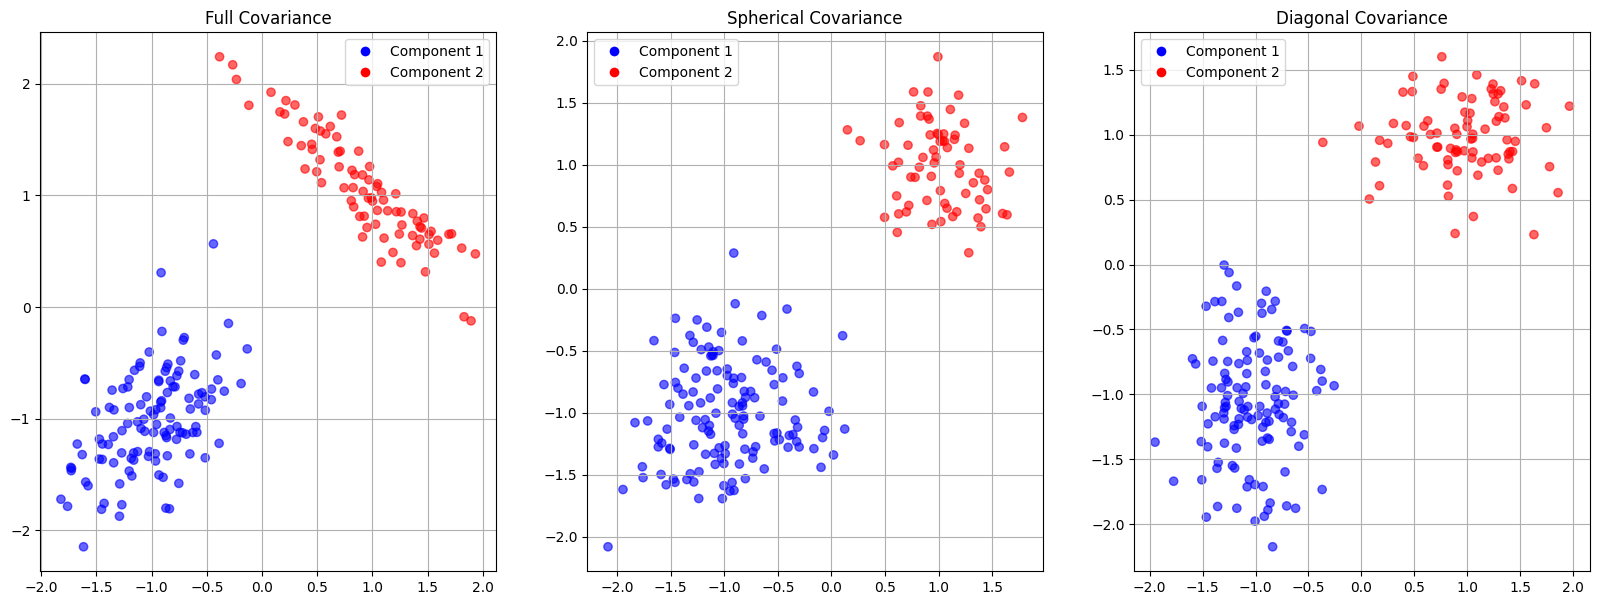

In [5]:
#All imports
import numpy as np
import pandas as pd
import random as rand
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy.stats import norm, multivariate_normal
import sys
import math

##########################################
#Part-6)-a: Generating synthetic data
##########################################

def generateData(pi, mu, sigma, N):
    ############################################################################
    #pi = weights of Gaussians, mu = mean of Gaussians, sigma = covariance of Gaussians, N = number of data points
    #Steps
    #1.Select the Gaussian following the probability distribution as pi
    #2.Sample the data points from the selected Gaussian
    #3.Repeat the process N times to get N data points
    #4.Return the sampled data
    ############################################################################
    #You may look into "random.choices" and "np.random.multivariate_normal" functions

    data = []
    labels = []
    for _ in range(N):
        # Select a Gaussian based on the weights
        k = rand.choices(range(len(pi)), weights=pi)[0]
        # Sample a data point from the selected Gaussian
        point = np.random.multivariate_normal(mu[k], sigma[k])
        data.append(point)
        labels.append(k)

    return np.asarray(data), np.asarray(labels)
    ############################################################################


############################################################################
#Chose the appropriate means ($\mu$), covariances ($\Sigma$), and weights
############################################################################
mu1 = [-1.0, -1.0]  # Mean vector of component1 in GMM
sig1 = [[0.15, 0.1], [0.1, 0.25]]  # Full covariance matrix of component1 in GMM
mu2 = [1.0, 1.0]  # Mean vector of component2 in GMM
sig2 = [[0.3, -0.25], [-0.25, 0.25]]  # Full covariance matrix of component2 in GMM
pi = [0.6, 0.4]  # Prior probabilities

n_points = 200  # Number of points

# Spherical covariances
sig1_s = [[0.2, 0.0], [0.0, 0.2]]
sig2_s = [[0.1, 0.0], [0.0, 0.1]]
# Diagonal covariances
sig1_d = [[0.1, 0.0], [0.0, 0.2]]
sig2_d = [[0.2, 0.0], [0.0, 0.1]]

############################################################################
#Create the synthetic data set
############################################################################

data_full, labels_full = generateData(pi, [mu1, mu2], [sig1, sig2], n_points)
data_sp, labels_sp = generateData(pi, [mu1, mu2], [sig1_s, sig2_s], n_points)
data_dg, labels_dg = generateData(pi, [mu1, mu2], [sig1_d, sig2_d], n_points)

############################################################################
#Plot the synthetic data set
############################################################################

fig, ax = plt.subplots(1, 3, figsize=(20, 7))

#Visualize the data sampled from the GMM with full covariance matrix
ax[0].scatter(data_full[:, 0], data_full[:, 1], c=labels_full, cmap=ListedColormap(['blue', 'red']), alpha=0.6)
ax[0].set_title('Full Covariance')
ax[0].legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', label='Component 1', markerfacecolor='blue', markersize=8),
    plt.Line2D([0], [0], marker='o', color='w', label='Component 2', markerfacecolor='red', markersize=8)
])
ax[0].grid(True)

#Visualize the data sampled from the GMM with spherical covariance matrix
ax[1].scatter(data_sp[:, 0], data_sp[:, 1], c=labels_sp, cmap=ListedColormap(['blue', 'red']), alpha=0.6)
ax[1].set_title('Spherical Covariance')
ax[1].legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', label='Component 1', markerfacecolor='blue', markersize=8),
    plt.Line2D([0], [0], marker='o', color='w', label='Component 2', markerfacecolor='red', markersize=8)
])
ax[1].grid(True)

#Visualize the data sampled from the GMM with diagonal covariance matrix
ax[2].scatter(data_dg[:, 0], data_dg[:, 1], c=labels_dg, cmap=ListedColormap(['blue', 'red']), alpha=0.6)
ax[2].set_title('Diagonal Covariance')
ax[2].legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', label='Component 1', markerfacecolor='blue', markersize=8),
    plt.Line2D([0], [0], marker='o', color='w', label='Component 2', markerfacecolor='red', markersize=8)
])
ax[2].grid(True)

plt.show()


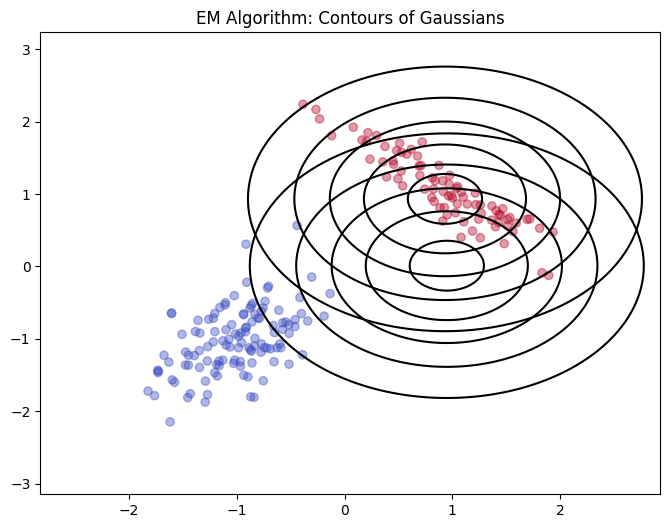

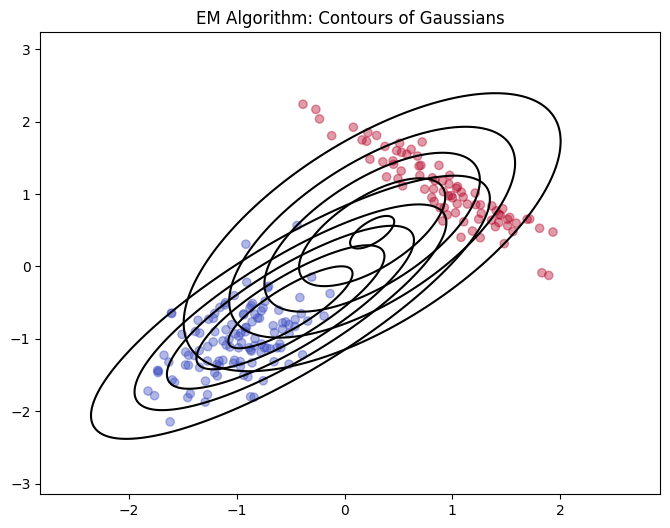

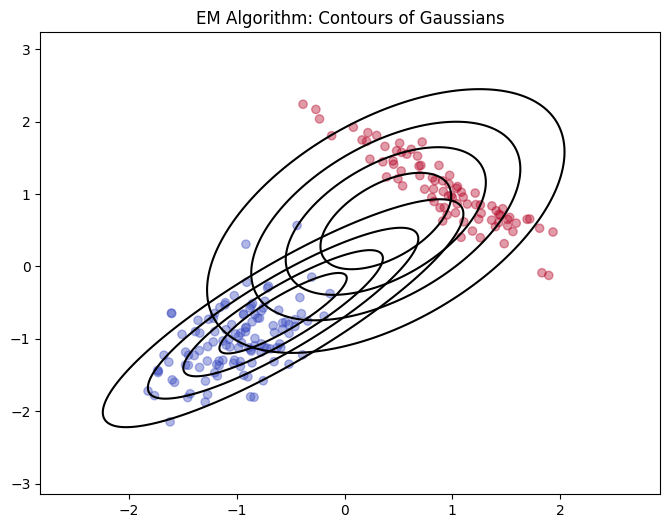

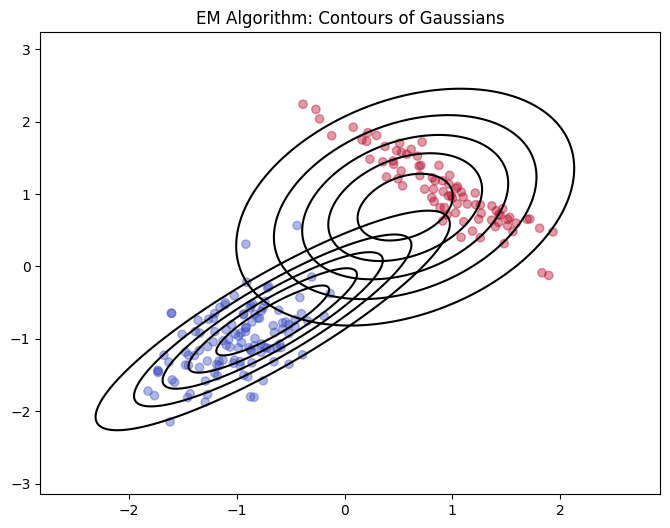

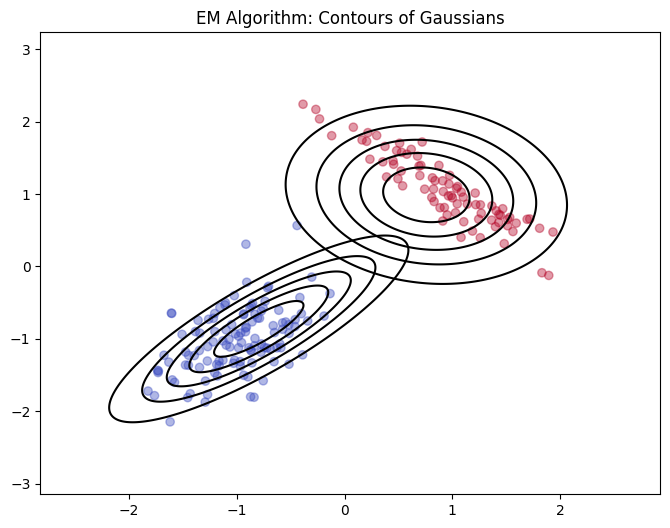

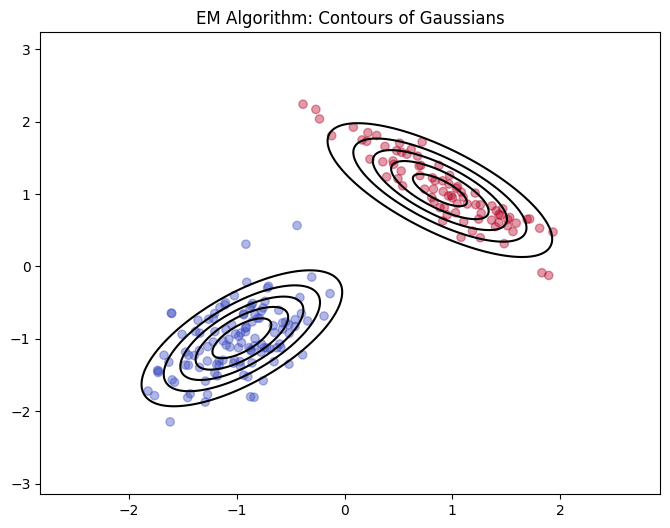

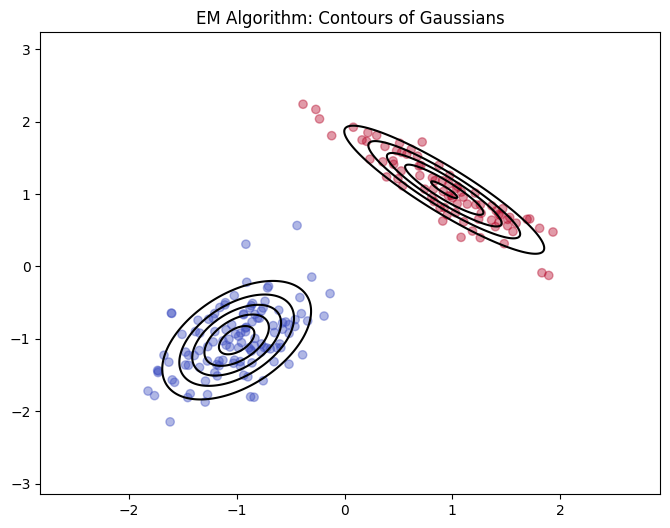

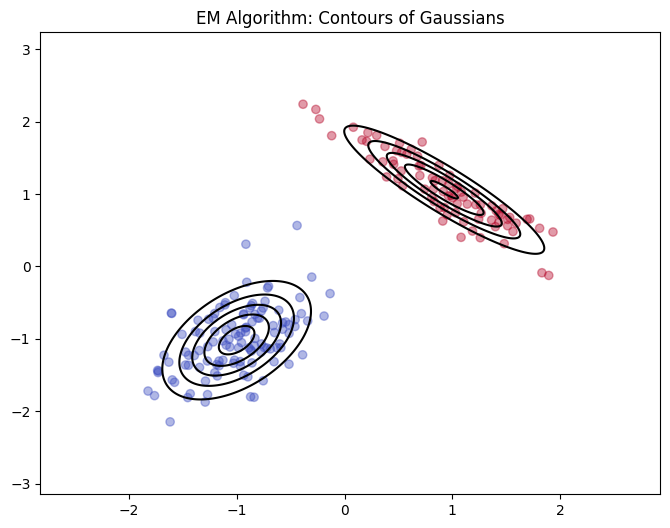

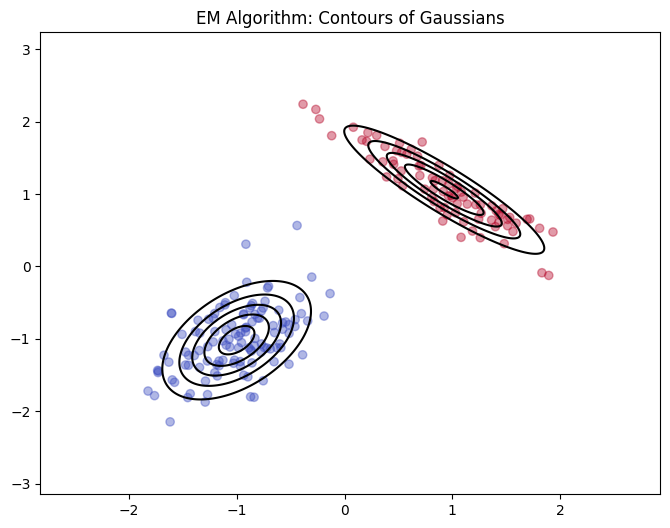

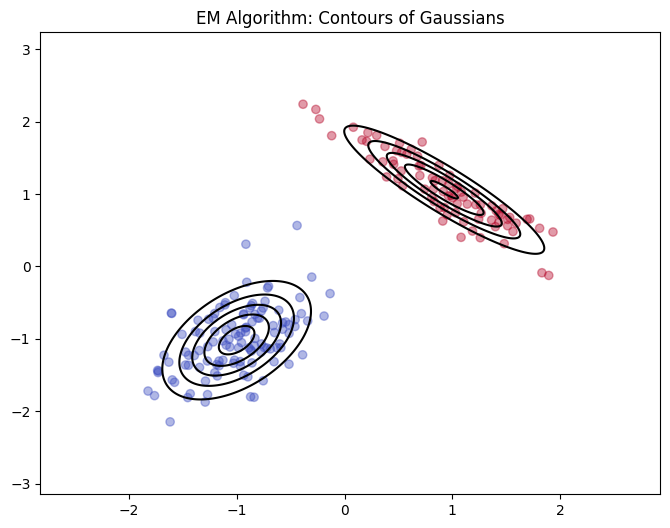

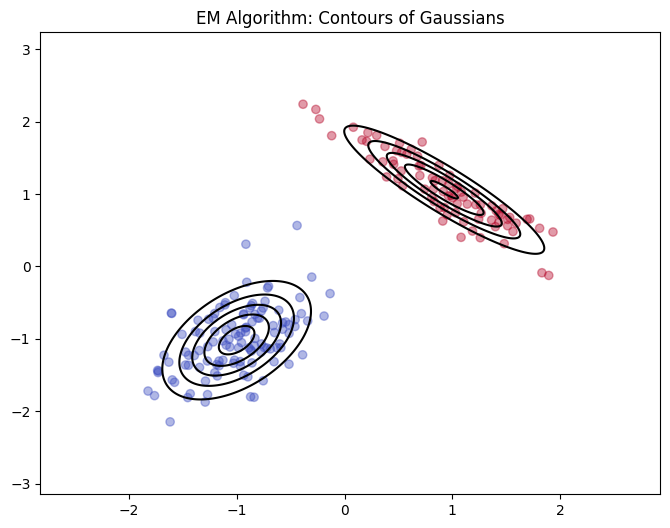

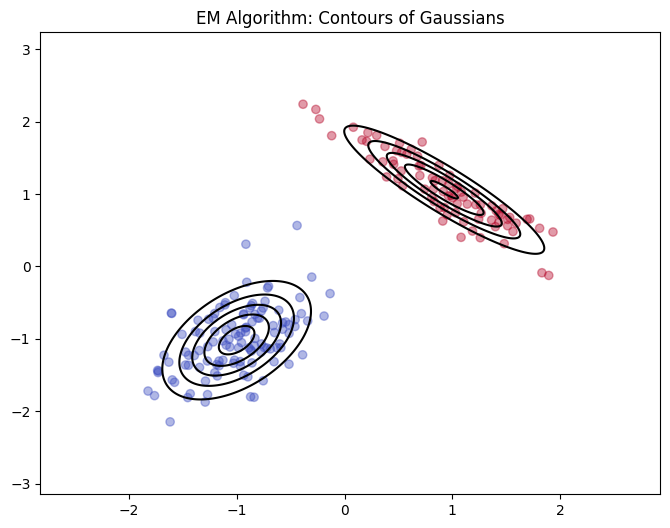

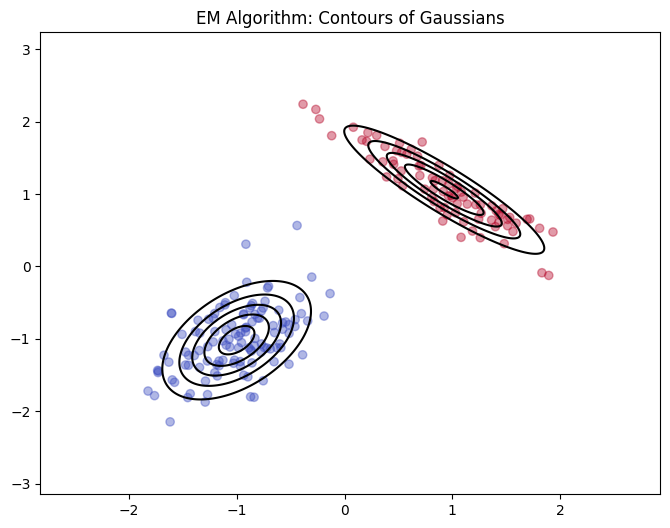

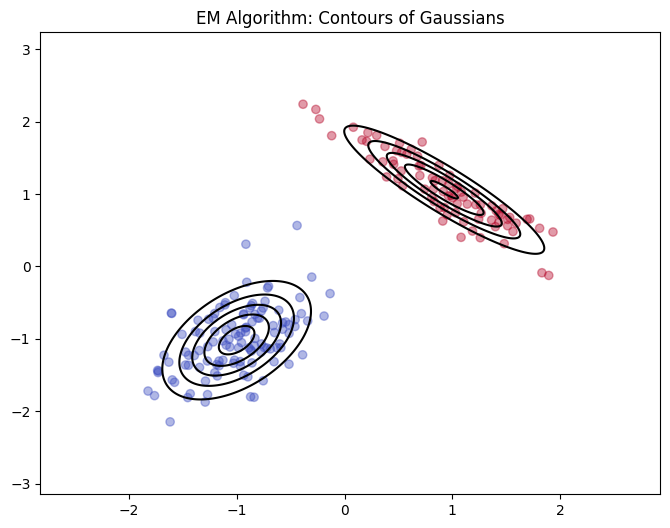

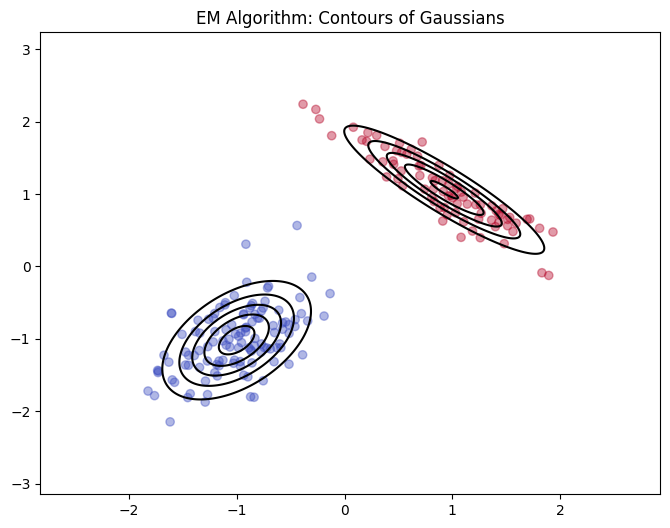

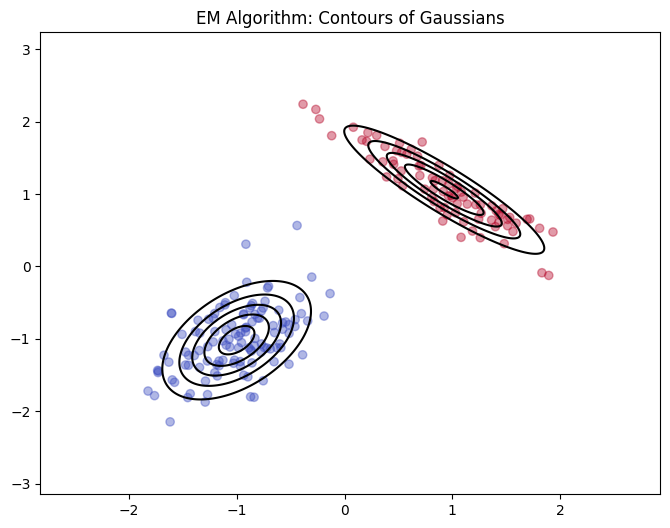

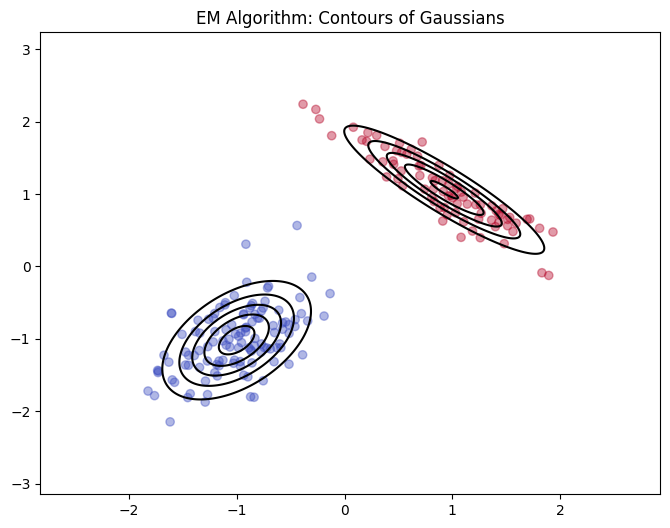

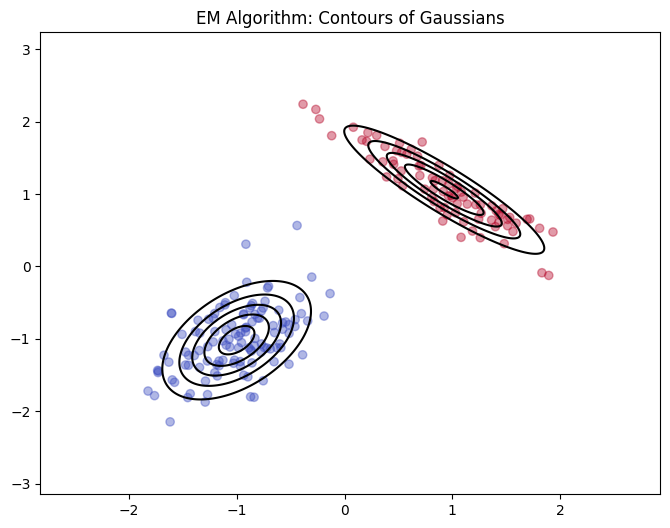

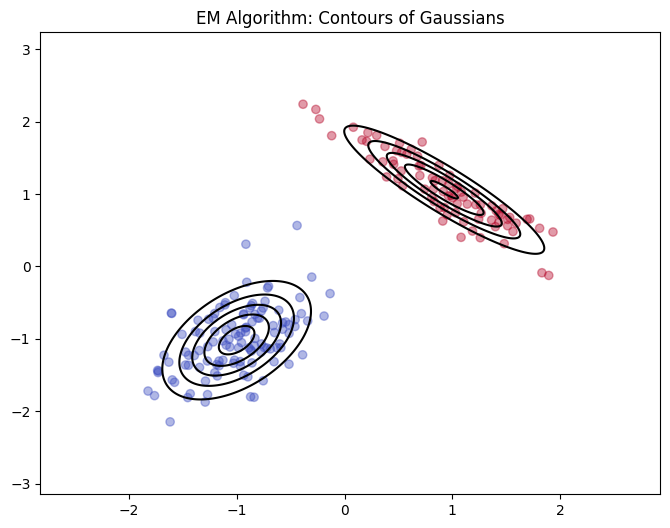

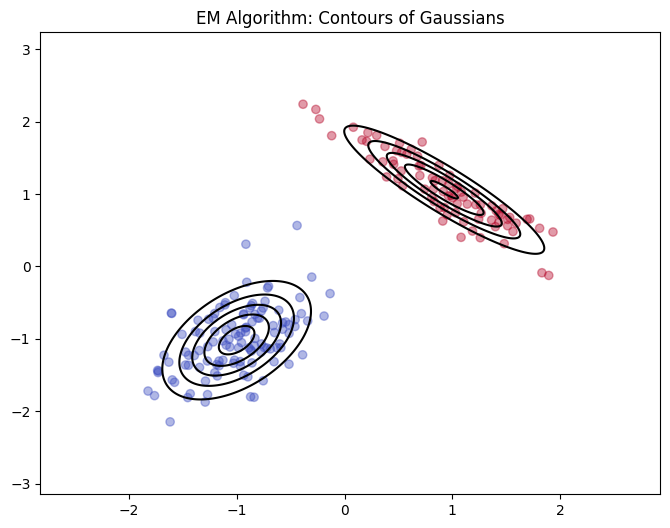

In [6]:
#All imports
import numpy as np
import pandas as pd
import random as rand
import matplotlib.pyplot as plt
from scipy.stats import norm, multivariate_normal
import sys
import math

##########################################
#Part-6)-b: Implimentation of Expectation-Maximization (EM) algorithm
##########################################

############################################################################
#Write a function to compute the log-likelihood of the data given the parameters
############################################################################
def likelihood(data, pi, mu, sigma, log_likelihood=False, likelihoods=False):
  #Inputs: data, parameters of GMM model
  #Outputs: likelihood

  N = data.shape[0]
  M = len(pi)
  total_ll = 0
  for n in range(N):
    s = 0
    for k in range(M):
      s += pi[k] * multivariate_normal.pdf(data[n], mean=mu[k], cov=sigma[k])
    total_ll += np.log(s)
  return total_ll

############################################################################
#Write a function for the expectation step
############################################################################
def expectation(data, pi, mu, sigma):
  #Inputs: data, parameters of GMM model
  #Outputs: gamma
  N = data.shape[0]
  M = len(pi)
  gamma = np.zeros((N, M))
  for n in range(len(data)):
    #Iterate through the data points
    for k in range(len(pi)):
      #Iterate through the components in GMM
      numerator = pi[k] * multivariate_normal.pdf(data[n], mean=mu[k], cov=sigma[k])
      denominator = sum(pi[j] * multivariate_normal.pdf(data[n], mean=mu[j], cov=sigma[j]) for j in range(len(pi)))
      gamma[n,k] = numerator/denominator
  return gamma

############################################################################
#Write a function for the maximization step.
############################################################################
def maximization(data, gamma):
  #Inputs: data, gamma
  #Outputs: Updated parameters of GMM model

  N, D = data.shape
  M = gamma.shape[1]

  #Update mu
  mu = []
  for k in range(M):
    mu_k = np.sum(gamma[:, k][:, np.newaxis] * data, axis=0) / np.sum(gamma[:, k])
    mu.append(mu_k)

  #Update sigma
  sigma = []
  for k in range(M):
    diff = data - mu[k]
    weighted_sum = np.zeros((D, D))
    for n in range(N):
      weighted_sum += gamma[n, k] * np.outer(diff[n], diff[n])
    sigma_k = weighted_sum / np.sum(gamma[:, k])
    sigma.append(sigma_k)

  #Update pi
  pi = np.sum(gamma, axis=0) / N

  #Return the parameters of GMM model
  return pi, mu, sigma

#Complete the below function. It plots the contours
def plot_contours(data, labels, pi, mu, sigma):
  plt.figure(figsize=(8, 6))
  plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='coolwarm', alpha=0.4)
  delta = 0.01
  x = np.arange(np.min(data[:, 0]) - 1, np.max(data[:, 0]) + 1, delta)
  y = np.arange(np.min(data[:, 1]) - 1, np.max(data[:, 1]) + 1, delta)
  X, Y = np.meshgrid(x, y)
  pos = np.dstack((X, Y))
  for k in range(len(pi)):
    rv = multivariate_normal(mu[k], sigma[k])
    plt.contour(X, Y, rv.pdf(pos), levels=5, colors='black')
  plt.title("EM Algorithm: Contours of Gaussians")
  plt.show()

############################################################################
#Run the expectation and maximzation algorithm to estimate the parameters
############################################################################
data = data_full     #data to run EM-algorithm
labels = labels_full   #labels
N = data.shape[0]       #number of input examples
D = data.shape[1]        #data dimension
M = 2        #no.of components in GMM

pi = [0.5, 0.5]       #Initialize the prior probabilities
mu = [np.random.rand(D), np.random.rand(D)]       #Initialize the mean vectors
sigma = [np.eye(D), np.eye(D)]    #Initialize the covariance matrices

nsteps = 20   #Number of steps to run EM algorithm
for index in range(0,nsteps,1):

  #Compute the likelihood
  ll = likelihood(data, pi, mu, sigma, log_likelihood=True)

  #Plot the contours
  plot_contours(data, labels, pi, mu, sigma)

  #Expectation step
  gamma = expectation(data, pi, mu, sigma)

  #Maximization step
  pi, mu, sigma = maximization(data, gamma)


In [ ]:
############################################################################
##Part-6)-d: Understand the issues with EM algorithm
############################################################################


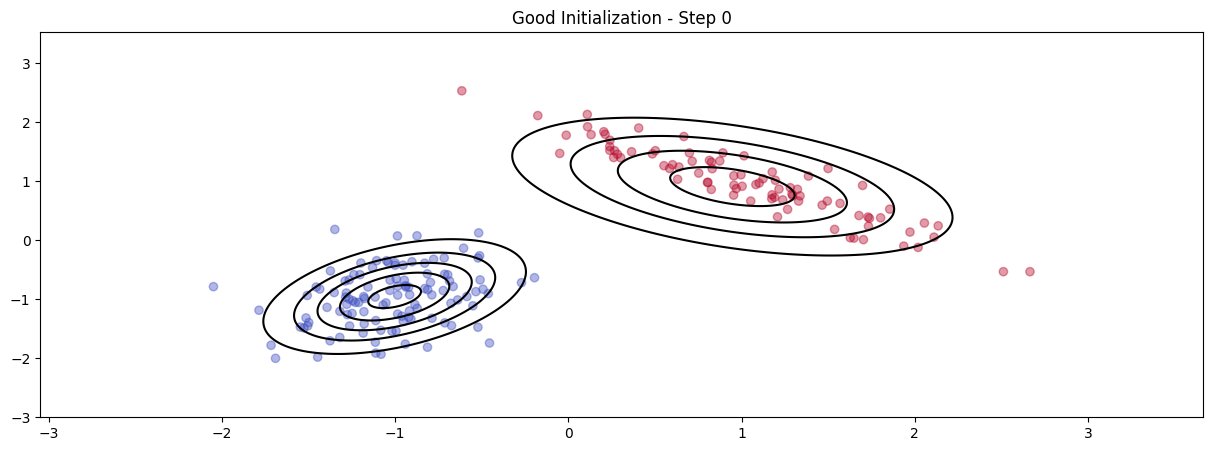

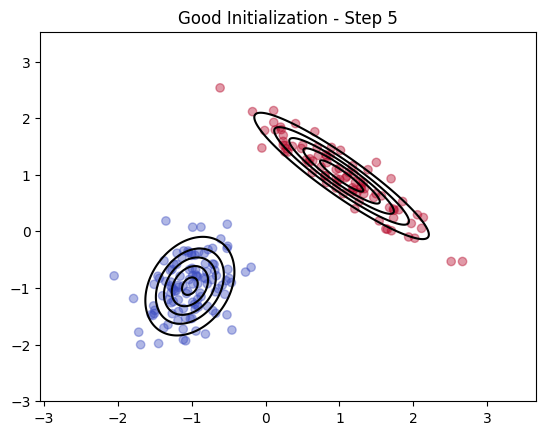

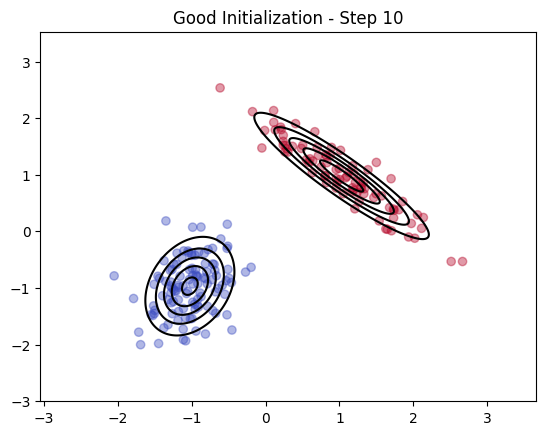

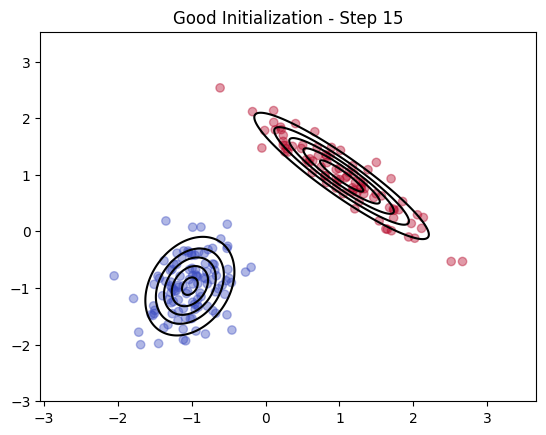

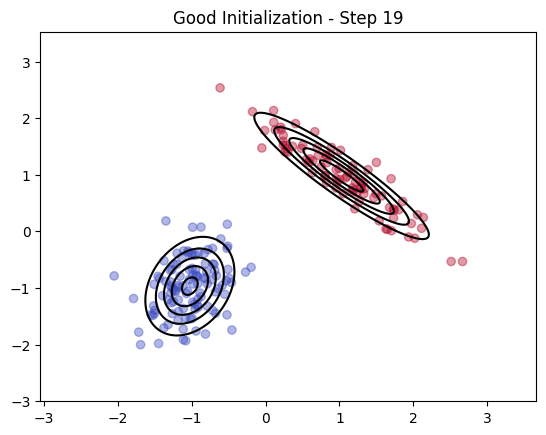

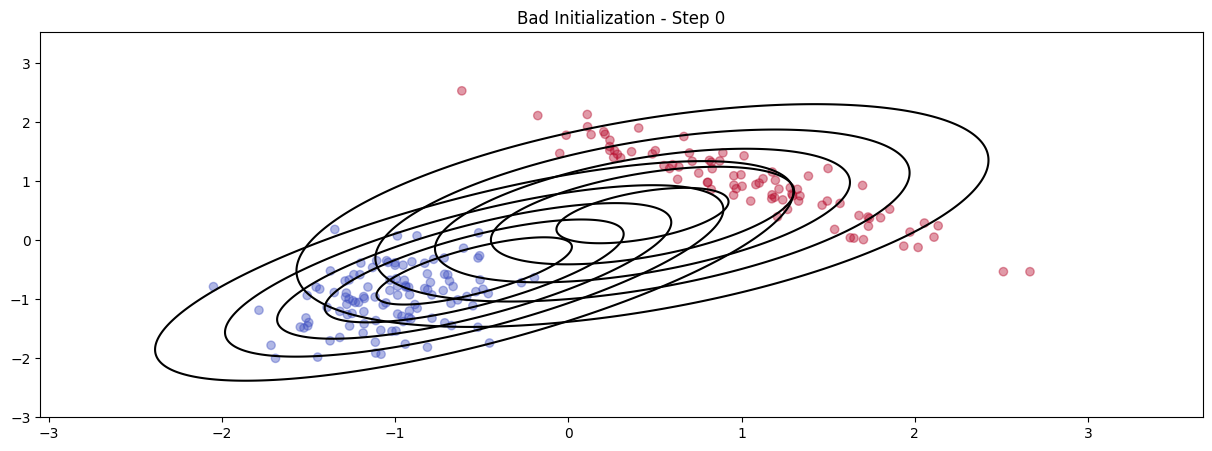

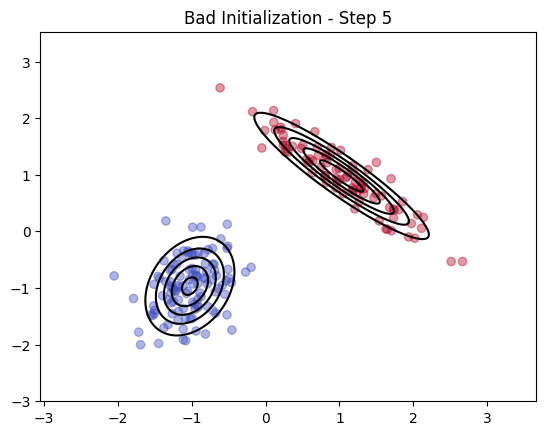

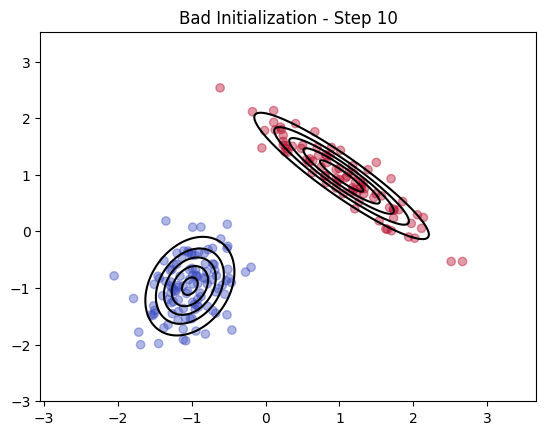

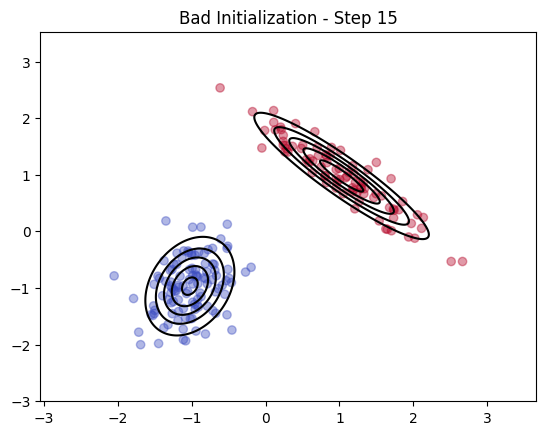

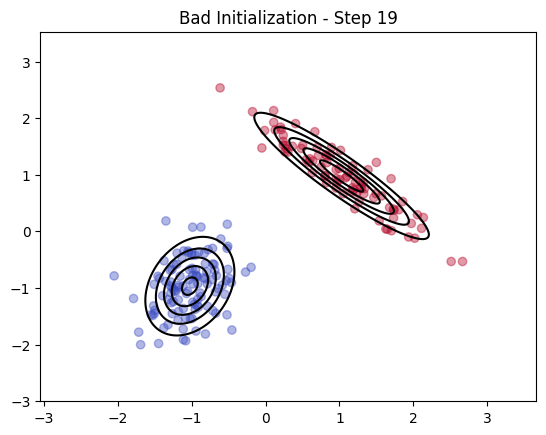

In [9]:
# Function to run EM with specified initial parameters and plot results
def run_em_initialization(data, labels, initial_mu, initial_sigma, initial_pi, nsteps=20, title=""):
    pi = initial_pi.copy()
    mu = [m.copy() for m in initial_mu]
    sigma = [s.copy() for s in initial_sigma]
    D = data.shape[1]

    plt.figure(figsize=(15, 5))
    for step in range(nsteps):
        # Expectation step
        gamma = expectation(data, pi, mu, sigma)
        # Maximization step
        pi, mu, sigma = maximization(data, gamma)

        # Plot every 5 steps
        if step % 5 == 0 or step == nsteps - 1:
            plt.clf()
            plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='coolwarm', alpha=0.4)
            delta = 0.01
            x = np.arange(np.min(data[:, 0]) - 1, np.max(data[:, 0]) + 1, delta)
            y = np.arange(np.min(data[:, 1]) - 1, np.max(data[:, 1]) + 1, delta)
            X, Y = np.meshgrid(x, y)
            pos = np.dstack((X, Y))
            for k in range(len(pi)):
                rv = multivariate_normal(mu[k], sigma[k])
                plt.contour(X, Y, rv.pdf(pos), levels=5, colors='black')
            plt.title(f"{title} - Step {step}")
            plt.pause(0.1)
    plt.show()

# Different initializations
# Good initialization (near true means)
mu_good = [np.array([-1.0, -1.0]), np.array([1.0, 1.0])]
sigma_good = [np.eye(2), np.eye(2)]
pi_good = [0.5, 0.5]

# Bad initialization (overlapping means)
mu_bad = [np.array([0.0, 0.0]), np.array([0.5, 0.5])]
sigma_bad = [np.eye(2), np.eye(2)]
pi_bad = [0.5, 0.5]

# Run with good initialization
run_em_initialization(data_full, labels_full, mu_good, sigma_good, pi_good, title="Good Initialization")

# Run with bad initialization
run_em_initialization(data_full, labels_full, mu_bad, sigma_bad, pi_bad, title="Bad Initialization")

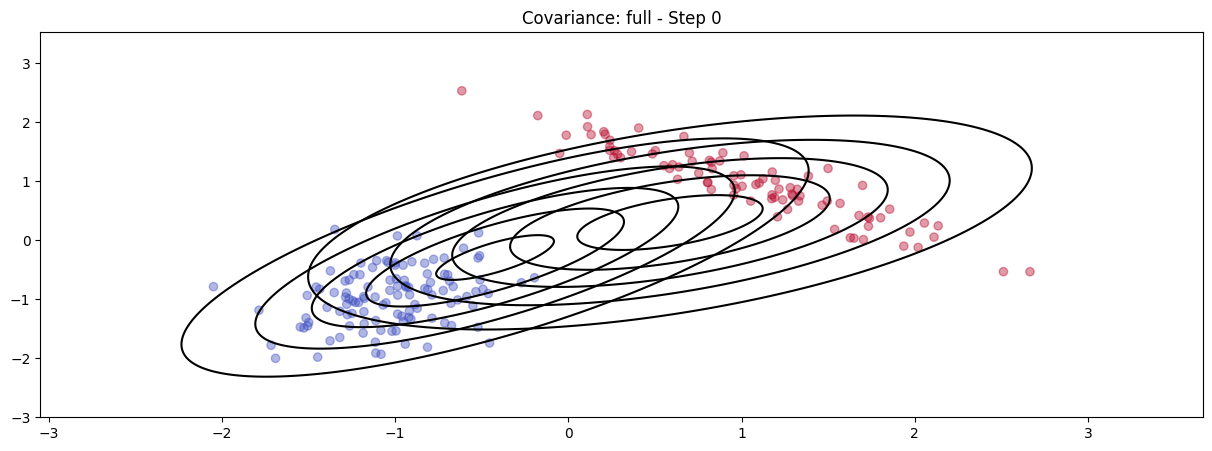

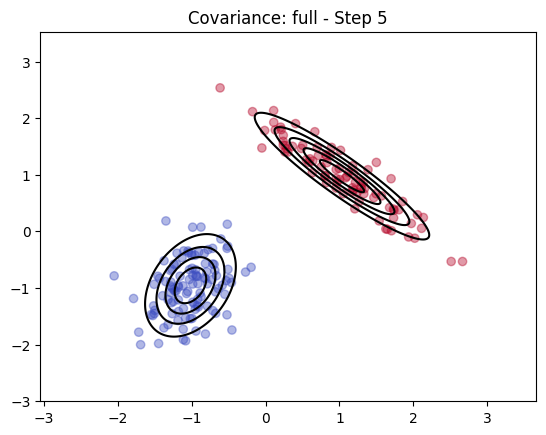

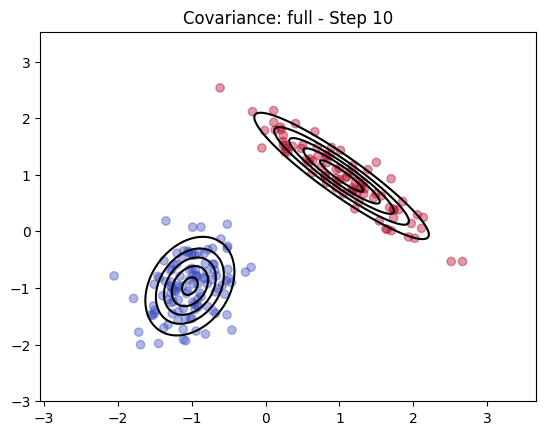

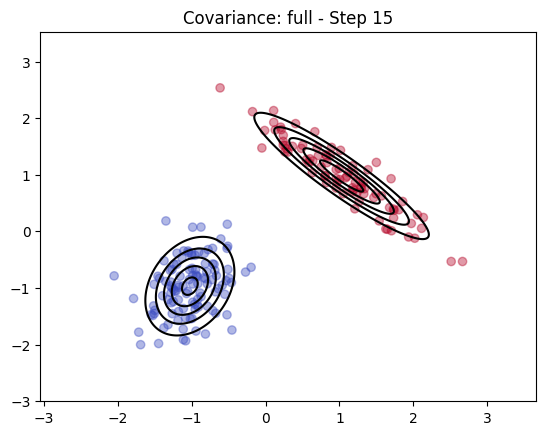

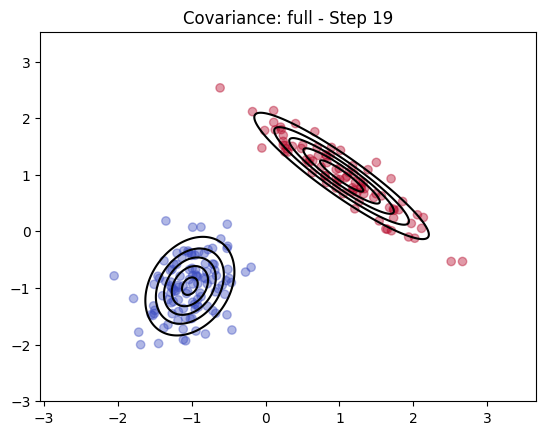

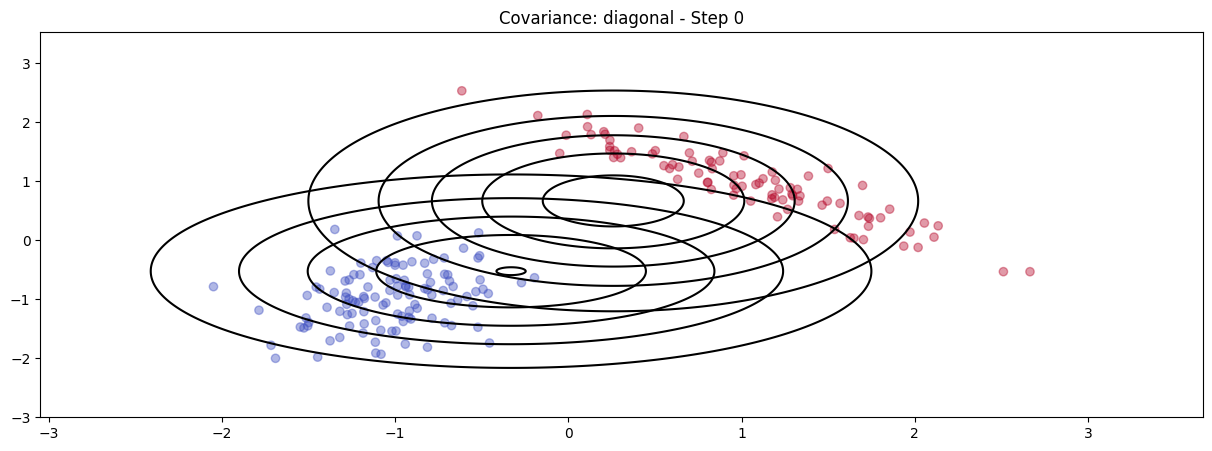

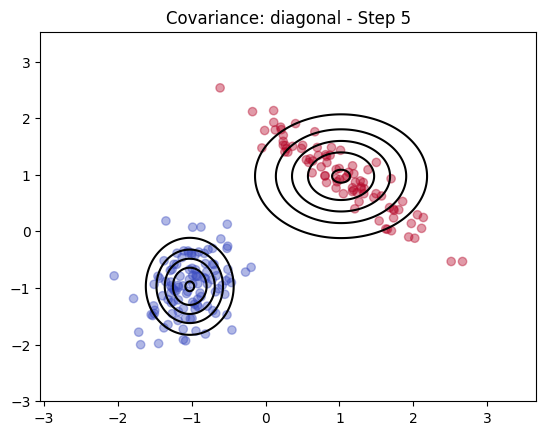

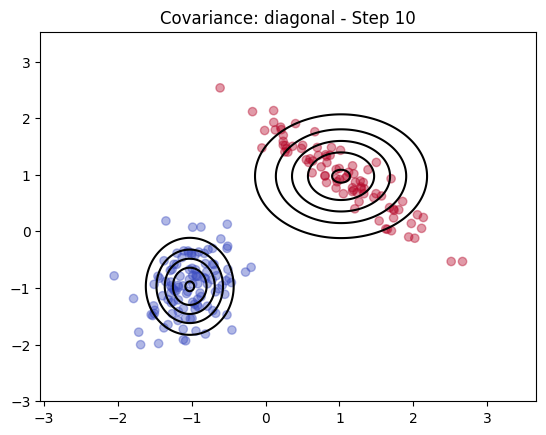

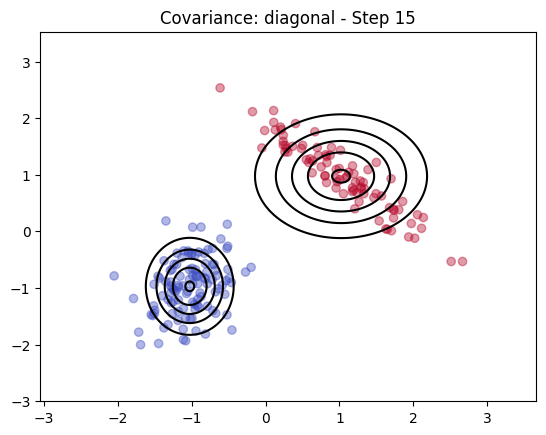

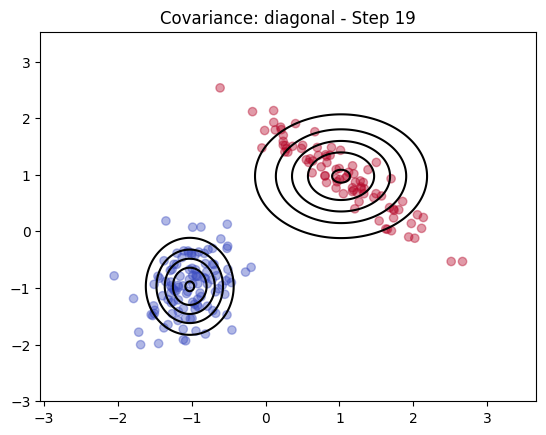

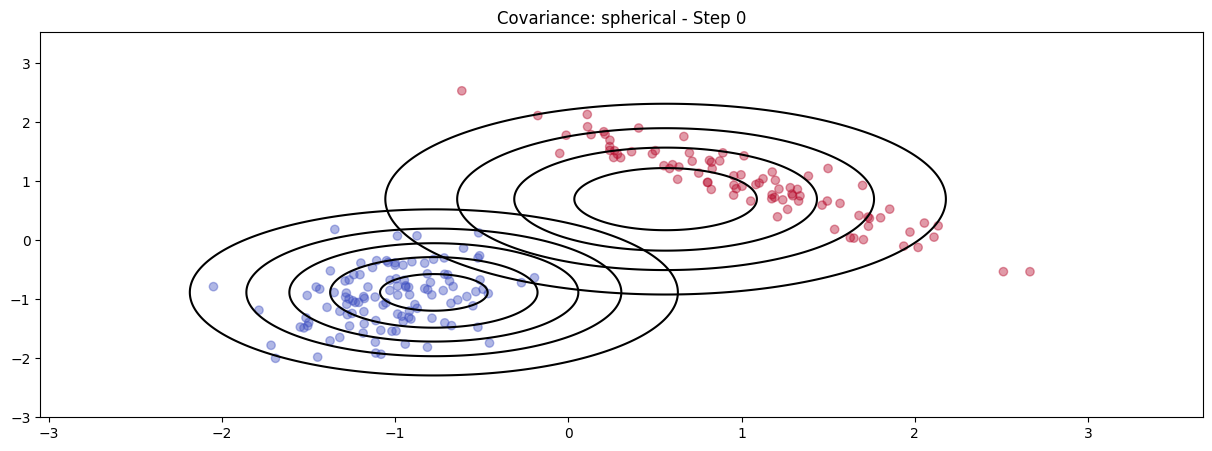

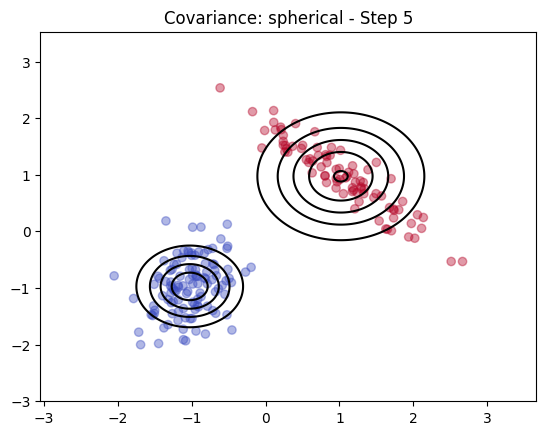

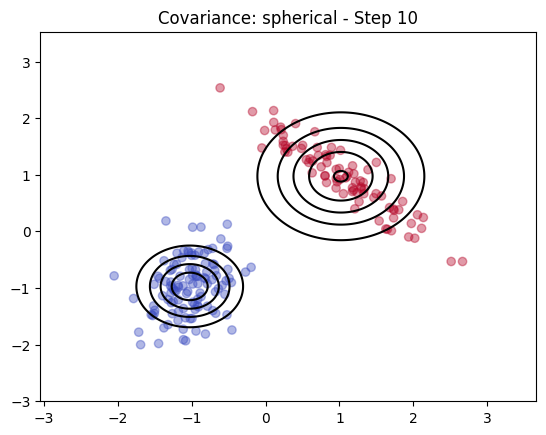

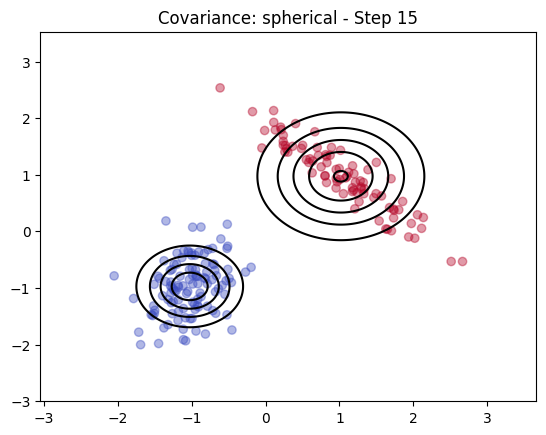

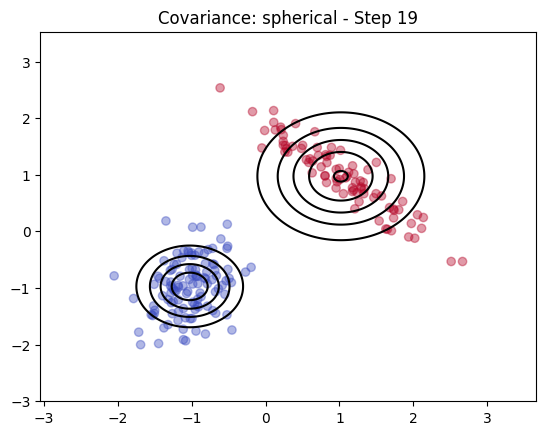

In [10]:
def maximization_cov_type(data, gamma, cov_type='full'):
    N, D = data.shape
    M = gamma.shape[1]
    mu = []
    for k in range(M):
        mu_k = np.sum(gamma[:, k][:, np.newaxis] * data, axis=0) / np.sum(gamma[:, k])
        mu.append(mu_k)
    sigma = []
    for k in range(M):
        diff = data - mu[k]
        weighted_sum = np.zeros((D, D))
        for n in range(N):
            weighted_sum += gamma[n, k] * np.outer(diff[n], diff[n])
        sigma_k = weighted_sum / np.sum(gamma[:, k])
        # Adjust covariance based on type
        if cov_type == 'spherical':
            avg_var = np.trace(sigma_k) / D
            sigma_k = avg_var * np.eye(D)
        elif cov_type == 'diagonal':
            sigma_k = np.diag(np.diag(sigma_k))
        sigma.append(sigma_k)
    pi = np.sum(gamma, axis=0) / N
    return pi, mu, sigma

def run_em_covariance(data, labels, cov_type, nsteps=20):
    D = data.shape[1]
    M = 2
    pi = [0.5, 0.5]
    mu = [np.random.randn(D), np.random.randn(D)]
    sigma = [np.eye(D), np.eye(D)]

    plt.figure(figsize=(15, 5))
    for step in range(nsteps):
        gamma = expectation(data, pi, mu, sigma)
        pi, mu, sigma = maximization_cov_type(data, gamma, cov_type)

        if step % 5 == 0 or step == nsteps - 1:
            plt.clf()
            plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='coolwarm', alpha=0.4)
            delta = 0.01
            x = np.arange(np.min(data[:, 0]) - 1, np.max(data[:, 0]) + 1, delta)
            y = np.arange(np.min(data[:, 1]) - 1, np.max(data[:, 1]) + 1, delta)
            X, Y = np.meshgrid(x, y)
            pos = np.dstack((X, Y))
            for k in range(len(pi)):
                rv = multivariate_normal(mu[k], sigma[k])
                plt.contour(X, Y, rv.pdf(pos), levels=5, colors='black')
            plt.title(f"Covariance: {cov_type} - Step {step}")
            plt.pause(0.1)
    plt.show()

# Run EM with different covariance types on data_full
run_em_covariance(data_full, labels_full, 'full')
run_em_covariance(data_full, labels_full, 'diagonal')
run_em_covariance(data_full, labels_full, 'spherical')

<b> Report your observations </b>

1. The EM algorithm successfully separated the two clusters, especially when using full and diagonal covariances, showing its effectiveness in parameter estimation.


2. Different initializations led to different convergence behaviors, with some poor initial values causing slower or incorrect clustering.

3. The type of covariance matrix affected the fit quality — full covariances gave the best results, while spherical covariances performed poorly on tilted clusters.

